Nuclear Power Capacity Statistics:
2005 Base Capacity: 362,106 MW
2005-2009 - Additions: 11,172 MW, Retirements: 3,012 MW, Total: 370,266 MW
2010-2014 - Additions: 15,855 MW, Retirements: 17,310 MW, Total: 368,811 MW
2015-2019 - Additions: 37,167 MW, Retirements: 23,672 MW, Total: 382,306 MW
2020-2024 - Additions: 28,747 MW, Retirements: 23,358 MW, Total: 387,695 MW

2024 Final Capacity by Country:
China: 55,257 MW
USA: 92,658 MW
France: 61,603 MW
Germany: 0 MW
Japan: 33,443 MW
Russia: 26,759 MW
UK: 6,170 MW
Others: 111,805 MW

2005 Base Capacity by Country:
China: 6,587 MW
USA: 98,298 MW
France: 63,363 MW
Germany: 21,496 MW
Japan: 44,139 MW
Russia: 20,793 MW
UK: 11,860 MW
Others: 95,570 MW


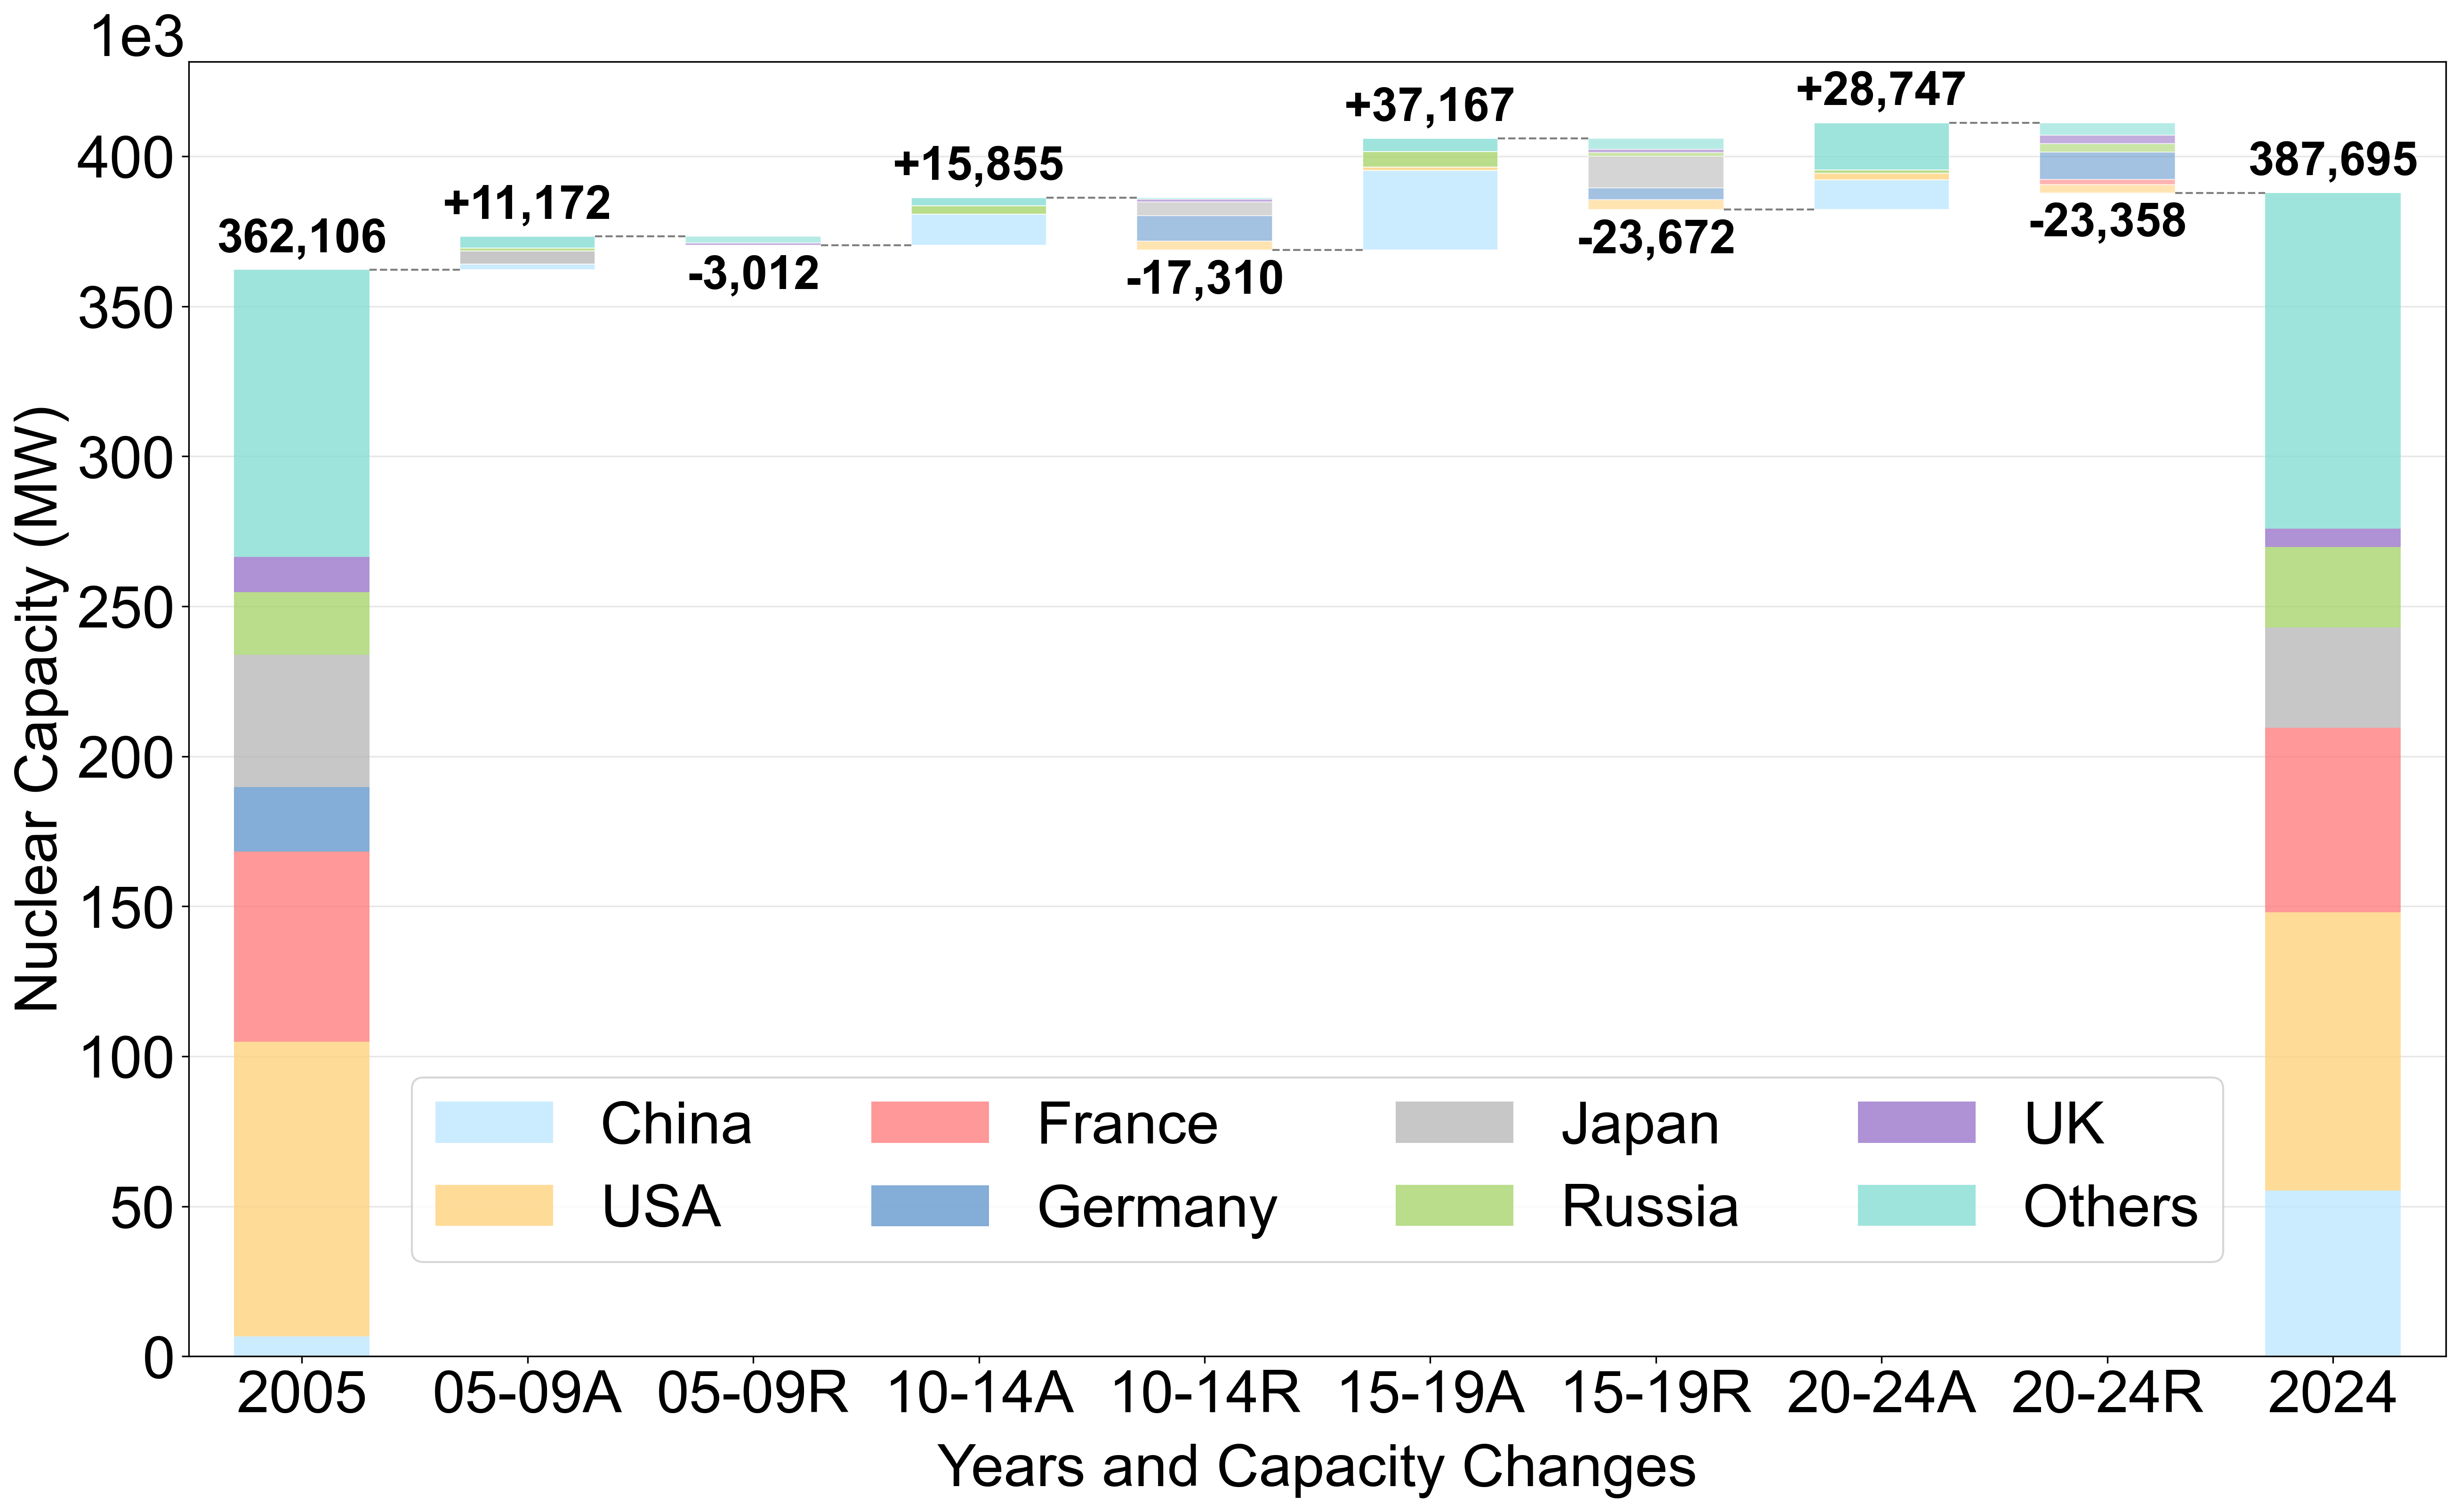

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle, Patch

# Set font to Arial with appropriate sizes
plt.rcParams['font.family'] = 'Arial' # Updated font to Arial
plt.rcParams['font.size'] = 26
plt.rcParams['axes.labelsize'] = 30 # Updated to 14
plt.rcParams['axes.titlesize'] = 30 # Updated to 14
plt.rcParams['legend.fontsize'] = 30 # Updated to 14
plt.rcParams['xtick.labelsize'] = 30 # Updated to 14
plt.rcParams['ytick.labelsize'] = 30 # Updated to 14

# Countries in order
countries = ['China', 'USA', 'France', 'Germany', 'Japan', 'Russia', 'UK', 'Others']
colors = ['#BEE8FF', '#FFD37F', '#FF7F7F', '#6699CD', '#B9B9B9', '#A8D56D', '#9B77CB', '#86DED4']

# Base capacity at end of 2004 (MW) - combining "before 2004" and "2004" data
base_2005 = {
    'China': 5977 + 610,
    'USA': 98298 + 0,
    'France': 63363 + 0,
    'Germany': 21496 + 0,
    'Japan': 44139 + 0,
    'Russia': 20793 + 0,
    'UK': 12052 - 192,
    'Others': 95849 + 996 - 1275  # before 2004 + 2004 new + retired
}

# Raw data for additions and retirements by year

yearly_data = {
    2005: {"new":     [   0,    0,    0,    0, 2392,  950,    0, 2436], "retired": [   0,    0,    0,    0,    0,    0,    0,    0]},
    2006: {"new":     [   0,    0,    0,    0, 1108,    0,    0, 1440], "retired": [   0,    0,    0,    0,    0,    0,  870,  549]},
    2007: {"new":     [1980,    0,    0,    0,    0,    0,    0,    0], "retired": [   0,    0,    0,    0,    0,    0,    0,    0]},
    2008: {"new":     [   0,    0,    0,    0,    0,    0,    0,    0], "retired": [   0,    0,    0,    0,    0,    0,    0,  408]},
    2009: {"new":     [   0,    0,    0,    0,  866,    0,    0,    0], "retired": [   0,    0,    0,    0,    0,    0,    0, 1185]},
    2010: {"new":     [1626,    0,    0,    0,    0,  950,    0,  404], "retired": [   0,    0,    0,    0,    0,    0,    0,    0]},
    2011: {"new":     [1626,    0,    0,    0,    0,    0,    0,  502], "retired": [   0, 2150,    0, 8422, 2719,    0,  217,    0]},
    2012: {"new":     [   0,    0,    0,    0,    0,  950,    0,    0], "retired": [   0,  217,    0,    0,    0,    0,  707,    0]},
    2013: {"new":     [2079,    0,    0,    0,    0,    0,    0,    0], "retired": [   0,  605,    0,    0, 1827,    0,    0,  446]},
    2014: {"new":     [5091,    0,    0,    0,    0,  950,    0, 1677], "retired": [   0,    0,    0,    0,    0,    0,    0,    0]},
    2015: {"new":     [6702,    0,    0,    0,    0,  789,    0,    0], "retired": [   0,  490,    0, 1275, 1659,    0,  490,    0]},
    2016: {"new":     [5680, 1150,    0,    0,    0,    0,    0, 1731], "retired": [   0,    0,    0,    0,  538,  385,    0,  638]},
    2017: {"new":     [2000,    0,    0,    0,    0, 1114,    0, 1245], "retired": [   0,  576,    0, 1284, 2486,    0,  576, 1049]},
    2018: {"new":     [8234,    0,    0,    0,    0, 2096,    0,    0], "retired": [   0,  625,    0,    0, 1036,  925,    0,    0]},
    2019: {"new":     [3830,    0,    0,    0,    0, 1178,    0, 1418], "retired": [   0, 1496,    0, 1402, 4797,   11,    0, 1934]},
    2020: {"new":     [1000,    0,    0,    0,    0, 1085,    0,    0], "retired": [   0, 1020, 1760,    0,    0,  925,    0,  881]},
    2021: {"new":     [3061,    0,    0,    0,    0,    0,    0, 3468], "retired": [   0, 1040,    0, 4058,    0,  925, 1500,   90]},
    2022: {"new":     [2061,    0,    0,    0,    0,    0,    0, 3699], "retired": [   0,  805,    0, 1006,    0,    0, 1330, 1006]},
    2023: {"new":     [1200, 1117,    0,    0,    0,    0,    0, 5124], "retired": [   0,    0,    0, 4049,    0,    0,    0, 1008]},
    2024: {"new":     [2500, 1117,    0,    0,    0,    0,    0, 3315], "retired": [   0,    0,    0,    0,    0,  925,    0, 1030]}
}

# Aggregate data by 5-year periods
periods = ['2005-2009', '2010-2014', '2015-2019', '2020-2024']
period_years = {
    '2005-2009': [2005, 2006, 2007, 2008, 2009],
    '2010-2014': [2010, 2011, 2012, 2013, 2014],
    '2015-2019': [2015, 2016, 2017, 2018, 2019],
    '2020-2024': [2020, 2021, 2022, 2023, 2024]
}

# Calculate aggregated data for each period
new_additions = {}
retirements = {}

for period, years in period_years.items():
    new_additions[period] = {}
    retirements[period] = {}
    
    for i, country in enumerate(countries):
        new_total = sum(yearly_data[year]['new'][i] for year in years)
        retired_total = sum(yearly_data[year]['retired'][i] for year in years)
        
        new_additions[period][country] = new_total
        retirements[period][country] = retired_total

def create_waterfall_chart():
    # Increased resolution with dpi parameter
    fig, ax = plt.subplots(figsize=(18, 11.29), dpi=300) 
    
    # Calculate cumulative values
    current_values = base_2005.copy()
    x_positions = []
    bar_labels = []
    
    # Starting position
    x_pos = 0
    x_positions.append(x_pos)
    bar_labels.append('2005')
    
    # Add positions for each period (additions and retirements)
    for period in periods:
        start_year_short = period[2:4] # e.g., '05' from '2005-2009'
        end_year_short = period[7:9]   # e.g., '09' from '2005-2009'
        
        x_pos += 1
        x_positions.append(x_pos)
        # Optimized x-axis label: simplified to 'YY-YY A'
        bar_labels.append(f'{start_year_short}-{end_year_short}A') 
        
        x_pos += 1
        x_positions.append(x_pos)
        # Optimized x-axis label: simplified to 'YY-YY R'
        bar_labels.append(f'{start_year_short}-{end_year_short}R') 
    
    # Final position
    x_pos += 1
    x_positions.append(x_pos)
    bar_labels.append('2024')
    
    bar_width = 0.6
    running_total = sum(base_2005.values())
    
    # Draw the waterfall chart
    for i, x_pos in enumerate(x_positions):
        if i == 0:
            # 2005 base capacity
            values = [base_2005[country] for country in countries]
            bottom = 0
            
            for j, (country, value) in enumerate(zip(countries, values)):
                if value > 0:
                    ax.bar(x_pos, value, bar_width, bottom=bottom, 
                           color=colors[j], alpha=0.8, label=country)
                    bottom += value
            
            current_total = sum(values)
            
        elif i == len(x_positions) - 1:
            # 2024 total
            values = [current_values[country] for country in countries]
            bottom = 0
            
            for j, (country, value) in enumerate(zip(countries, values)):
                if value > 0:
                    ax.bar(x_pos, value, bar_width, bottom=bottom, 
                           color=colors[j], alpha=0.8)
                    bottom += value
            
            current_total = sum(values)
            
        else:
            # Intermediate periods - additions and retirements
            period_idx = (i - 1) // 2
            period = periods[period_idx]
            is_addition = (i - 1) % 2 == 0
            
            if is_addition:
                # New additions
                values = [new_additions[period][country] for country in countries]
                total_change = sum(values)
                
                if total_change > 0:
                    bottom = current_total
                    for j, (country, value) in enumerate(zip(countries, values)):
                        if value > 0:
                            ax.bar(x_pos, value, bar_width, bottom=bottom, 
                                   color=colors[j], alpha=0.8, edgecolor='white', linewidth=0.5)
                            bottom += value
                    
                    # Connect to previous bar
                    ax.plot([x_positions[i-1] + bar_width/2, x_pos - bar_width/2], 
                            [current_total, current_total], 'k--', alpha=0.5, linewidth=1)
                    
                    current_total += total_change
                else:
                    # No additions - draw connection line
                    ax.plot([x_positions[i-1] + bar_width/2, x_pos - bar_width/2], 
                            [current_total, current_total], 'k--', alpha=0.5, linewidth=1)
                
            else:
                # Retirements
                values = [retirements[period][country] for country in countries]
                total_change = sum(values)
                
                if total_change > 0:
                    bottom = current_total - total_change
                    for j, (country, value) in enumerate(zip(countries, values)):
                        if value > 0:
                            ax.bar(x_pos, value, bar_width, bottom=bottom, 
                                   color=colors[j], alpha=0.6, edgecolor='white', 
                                   linewidth=0.5)
                            bottom += value
                    
                    # Connect to previous bar
                    ax.plot([x_positions[i-1] + bar_width/2, x_pos - bar_width/2], 
                            [current_total, current_total], 'k--', alpha=0.5, linewidth=1)
                    
                    current_total -= total_change
                    
                    # Update current values
                    for country in countries:
                        current_values[country] -= retirements[period][country]
                else:
                    # No retirements - draw connection line
                    ax.plot([x_positions[i-1] + bar_width/2, x_pos - bar_width/2], 
                            [current_total, current_total], 'k--', alpha=0.5, linewidth=1)
                
                # Update current values after additions (done after retirement processing)
                if not is_addition:
                    for country in countries:
                        current_values[country] += new_additions[period][country]
    
    # Final connection line
    ax.plot([x_positions[-2] + bar_width/2, x_positions[-1] - bar_width/2], 
            [current_total, current_total], 'k--', alpha=0.5, linewidth=1)
    
    # Set axes properties
    ax.set_xlim(-0.5, len(x_positions) - 0.5)
    ax.set_xticks(x_positions)
    # X-axis labels: no rotation
    ax.set_xticklabels(bar_labels, ha='center') 
    ax.set_ylabel('Nuclear Capacity (MW)', fontsize=plt.rcParams['axes.labelsize']) # Use rcParams
    # Removed plot title
    # ax.set_title('Nuclear Power Capacity Changes by Country (2005-2024)', 
    #              fontsize=16, fontweight='bold', pad=20)
    
    # Add x-axis title
    ax.set_xlabel('Years and Capacity Changes', fontsize=plt.rcParams['axes.labelsize'], labelpad=10) # Use rcParams

    # Add legend at the bottom inside the plot, close to x-axis, and remove legend border
    # Adjust bbox_to_anchor to place it inside the plot area, just above the x-axis labels
    legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, 0.05), # Adjusted y-coordinate to 0.05
                       ncol=4, fancybox=True, shadow=False, frameon=True, fontsize=plt.rcParams['legend.fontsize']) # Use rcParams
    # Removed legend title
    # legend.set_title('Countries', prop={'size': 11, 'weight': 'bold'})
    
    # Add grid
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_axisbelow(True)

    # Use scientific notation to format y-axis in 10^3 (kilo) style
    ax.ticklabel_format(style='sci', axis='y', scilimits=(3, 3))
    # Access the y-axis offset text and manually reposition it
    ax.yaxis.get_offset_text().set_x(-0.045)  # Move left or right (negative is left)
    # ax.yaxis.get_offset_text().set_y(-5)  # Move up or down (1.0 is baseline = y axis top)



    # Add value labels on top of bars
    # This loop intelligently positions labels:
    # - Positive changes (Additions) are placed ABOVE their bars.
    # - Negative changes (Retirements) are placed BELOW their bars.
    # - A consistent offset is maintained for all labels.
    label_running_total = sum(base_2005.values())
    
    # Define a consistent vertical offset for all text labels
    text_offset = 3000 # Adjust this value for desired spacing

    for i, x_pos in enumerate(x_positions):
        # Handle the start and end total bars (positioning is always above)
        if i == 0:
            # Base bar (2005) - shows total
            total = sum(base_2005.values())
            ax.text(x_pos, total + text_offset, f'{total:,.0f}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=plt.rcParams['font.size'] - 2)
        
        elif i == len(x_positions) - 1:
            # Final bar (2024) - shows total
            total = sum(current_values.values())
            ax.text(x_pos, total + text_offset, f'{total:,.0f}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=plt.rcParams['font.size'] - 2)
        
        # Handle the intermediate change bars
        else:
            period_idx = (i - 1) // 2
            period = periods[period_idx]
            is_addition = (i - 1) % 2 == 0
            
            if is_addition:
                change = sum(new_additions[period].values())
                if change > 0:
                    # Bar top is at 'label_running_total + change'
                    # Place text above the bar top
                    y_pos = label_running_total + change + text_offset
                    ax.text(x_pos, y_pos, f'+{change:,.0f}', ha='center', va='bottom', 
                            fontweight='bold', fontsize=plt.rcParams['font.size'] - 2)
                    # Update the running total for the next bar's position
                    label_running_total += change
            
            else: # Retirement
                change = sum(retirements[period].values())
                if change > 0:
                    # Bar bottom is at 'label_running_total - change'
                    # Place text below the bar bottom
                    y_pos = label_running_total - change - text_offset
                    ax.text(x_pos, y_pos, f'-{change:,.0f}', ha='center', va='top', 
                            fontweight='bold', fontsize=plt.rcParams['font.size'] - 2)
                    # Update the running total for the next bar's position
                    label_running_total -= change
    
    # The second legend for bar types was removed in the previous iteration, keeping it removed.
    
    # Removed rect parameter from tight_layout as legend is now inside the plot
    plt.tight_layout() 
    return fig, ax

# Create the chart
fig, ax = create_waterfall_chart()
# plt.show()
plt.savefig('../output/figs/nuclear_capacity_waterfall.pdf', bbox_inches='tight')
# plt.close()

# Print statistics (unchanged from original code)
print("Nuclear Power Capacity Statistics:")
print(f"2005 Base Capacity: {sum(base_2005.values()):,.0f} MW")

current_values = base_2005.copy()
for period in periods:
    additions = sum([new_additions[period][country] for country in countries])
    retirements_total = sum([retirements[period][country] for country in countries])
    
    for country in countries:
        current_values[country] += new_additions[period][country] - retirements[period][country]
    
    total = sum(current_values.values())
    print(f"{period} - Additions: {additions:,.0f} MW, Retirements: {retirements_total:,.0f} MW, Total: {total:,.0f} MW")

print(f"\n2024 Final Capacity by Country:")
for country in countries:
    print(f"{country}: {current_values[country]:,.0f} MW")

# Print base capacity breakdown
print(f"\n2005 Base Capacity by Country:")
for country in countries:
    print(f"{country}: {base_2005[country]:,.0f} MW")


Data Summary:
------------------------------------------------------------
Country      Overnight  3% Int   7% Int   10% Int 
------------------------------------------------------------
USA          $4,250     $4,721   $5,435   $6,041  
France       $4,013     $4,459   $5,132   $5,705  
Japan        $3,963     $4,402   $5,068   $5,633  
China        $2,500     $2,777   $3,197   $3,554  
South Korea  $2,157     $2,396   $2,759   $3,066  
Russia       $2,271     $2,523   $2,904   $3,228  
India        $2,778     $3,086   $3,552   $3,949  


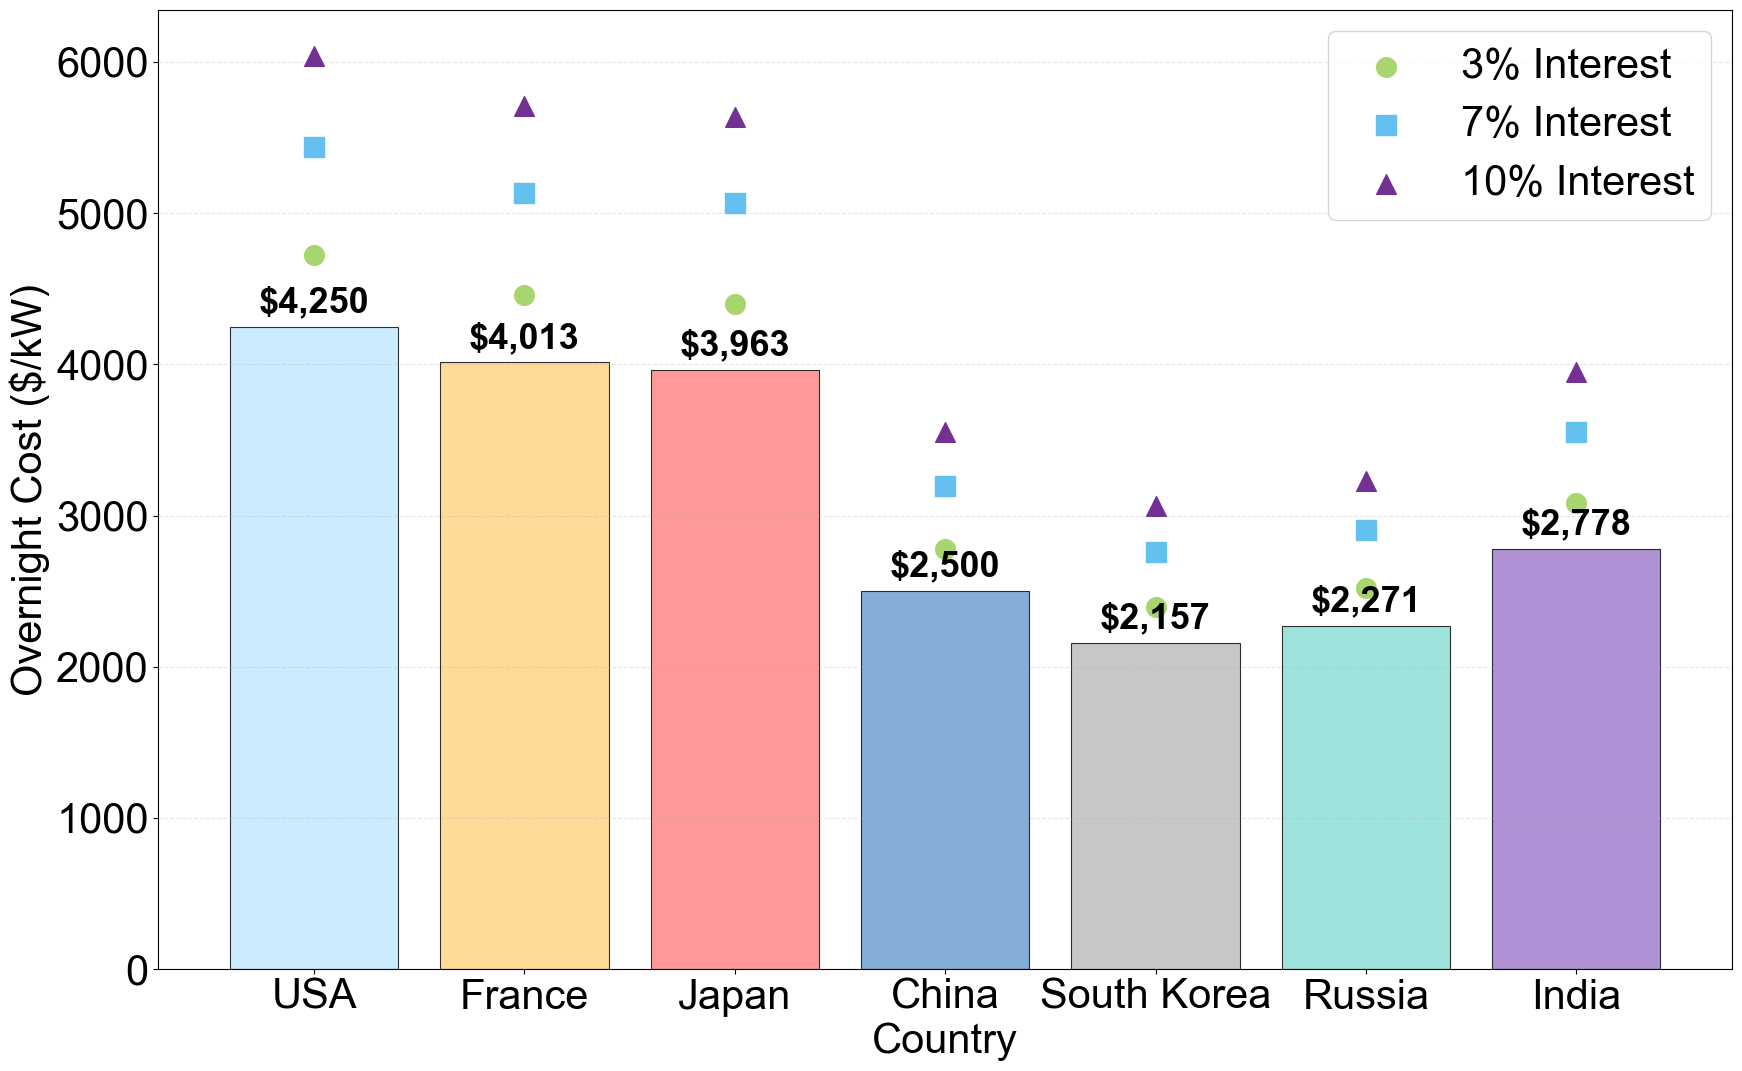

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
countries = ['USA', 'France', 'Japan', 'China', 'South Korea', 'Russia', 'India']
overnight_cost = [4250, 4013, 3963, 2500, 2157, 2271, 2778]
investment_3pct = [4721, 4459, 4402, 2777, 2396, 2523, 3086]
investment_7pct = [5435, 5132, 5068, 3197, 2759, 2904, 3552]
investment_10pct = [6041, 5705, 5633, 3554, 3066, 3228, 3949]

# Colors
colors = ['#BEE8FF', '#FFD37F', '#FF7F7F', '#6699CD', '#B9B9B9', '#86DED4', '#9B77CB', '#A8D56D']

# Create figure and axis
fig, ax = plt.subplots(figsize=(18, 11.29))

# Create bar chart
x = np.arange(len(countries))
bars = ax.bar(x, overnight_cost, color=colors[:len(countries)], alpha=0.8, edgecolor='black', linewidth=0.8)

# Add markers for investment costs - all on the same vertical line (center of bars)
ax.scatter(x, investment_3pct, color='#A8D56D', marker='o', s=200, label='3% Interest', zorder=3)
ax.scatter(x, investment_7pct, color='#63C0EF', marker='s', s=200, label='7% Interest', zorder=3)
ax.scatter(x, investment_10pct, color='#723193', marker='^', s=200, label='10% Interest', zorder=3)

# Customize the chart
ax.set_xlabel('Country')
ax.set_ylabel('Overnight Cost ($/kW)')
# ax.set_title('Nuclear Power Plant Costs by Country\n(Overnight Cost with Investment Cost Markers)', 
#              fontsize=14, fontweight='bold', pad=20)

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(countries)

# Add legend
ax.legend(loc='upper right', frameon=True)

# Add grid
ax.grid(True, axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, cost) in enumerate(zip(bars, overnight_cost)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
            f'${cost:,}', ha='center', va='bottom', fontweight='bold', fontsize=26)

# Adjust layout and display
plt.tight_layout()
# plt.show()
plt.savefig('../output/figs/nuclear_cost_by_country.pdf', bbox_inches='tight')

# Print the data for reference
print("Data Summary:")
print("-" * 60)
print(f"{'Country':<12} {'Overnight':<10} {'3% Int':<8} {'7% Int':<8} {'10% Int':<8}")
print("-" * 60)
for i, country in enumerate(countries):
    print(f"{country:<12} ${overnight_cost[i]:<9,} ${investment_3pct[i]:<7,} ${investment_7pct[i]:<7,} ${investment_10pct[i]:<7,}")

LCOE Breakdown Summary:
----------------------------------------------------------------------
Country      Capital  O&M      Fuel     Total LCOE
----------------------------------------------------------------------
USA          $50.32   $11.60   $9.33    $71.25    
France       $47.51   $14.26   $9.33    $71.10    
Japan        $46.92   $25.84   $13.92   $86.68    
China        $29.60   $26.42   $10.00   $66.02    
South Korea  $25.54   $18.44   $9.33    $53.31    
Russia       $26.88   $10.15   $4.99    $42.02    
India        $32.89   $5.43    $9.33    $47.65    
----------------------------------------------------------------------
PV Baseline: $47 USD/MWh
Wind Baseline: $40 USD/MWh


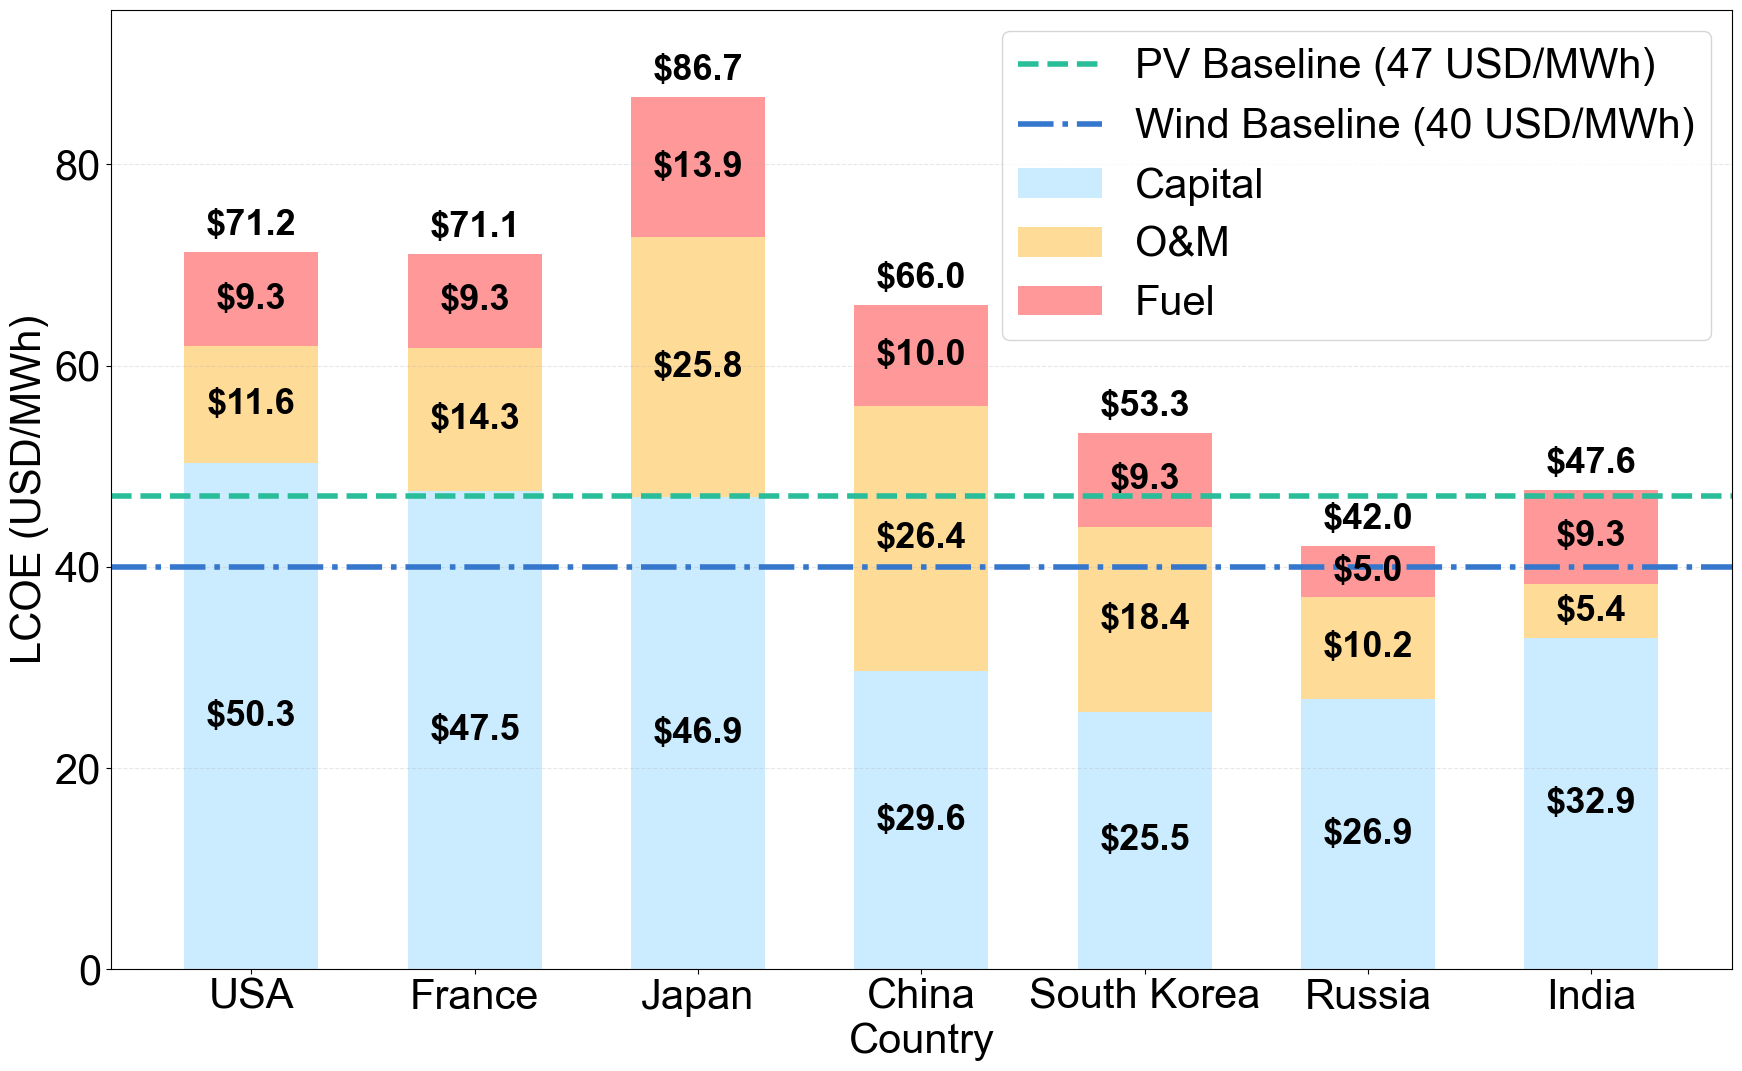

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
countries = ['USA', 'France', 'Japan', 'China', 'South Korea', 'Russia', 'India']
capital = [50.32, 47.51, 46.92, 29.60, 25.54, 26.88, 32.89]
om = [11.60, 14.26, 25.84, 26.42, 18.44, 10.15, 5.43]
fuel = [9.33, 9.33, 13.92, 10.00, 9.33, 4.99, 9.33]
lcoe = [71.25, 71.10, 86.68, 66.02, 53.31, 42.02, 47.65]

# Baseline values
pv_baseline = 47
wind_baseline = 40

# Colors for stacked bars
colors = ['#BEE8FF', '#FFD37F', '#FF7F7F', '#6699CD', '#B9B9B9', '#86DED4', '#9B77CB', '#A8D56D']
stack_colors = ['#BEE8FF', '#FFD37F', '#FF7F7F']  # Green, Orange, Red for Capital, O&M, Fuel

# Create figure and axis
fig, ax = plt.subplots(figsize=(18, 11.29))

# Create stacked bar chart
x = np.arange(len(countries))
width = 0.6

# Create stacked bars
bars1 = ax.bar(x, capital, width, label='Capital', color=stack_colors[0], alpha=0.8)
bars2 = ax.bar(x, om, width, bottom=capital, label='O&M', color=stack_colors[1], alpha=0.8)
bars3 = ax.bar(x, fuel, width, bottom=np.array(capital) + np.array(om), label='Fuel', color=stack_colors[2], alpha=0.8)

# Add horizontal baseline lines
ax.axhline(y=pv_baseline, color='#29BD9A', linestyle='--', linewidth=4, label='PV Baseline (47 USD/MWh)')
ax.axhline(y=wind_baseline, color='#3677CE', linestyle='-.', linewidth=4, label='Wind Baseline (40 USD/MWh)')

# Customize the chart
ax.set_xlabel('Country')
ax.set_ylabel('LCOE (USD/MWh)')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(countries)

# Add legend
ax.legend(loc='upper right', frameon=True)

# Add grid
ax.grid(True, axis='y', alpha=0.3, linestyle='--')

# Add total LCOE value labels on top of bars
for i, (total_lcoe, country) in enumerate(zip(lcoe, countries)):
    ax.text(x[i], total_lcoe + 1, f'${total_lcoe:.1f}', 
            ha='center', va='bottom', fontweight='bold')

# Add component value labels within each segment
for i in range(len(countries)):
    # Capital cost label (bottom segment)
    ax.text(x[i], capital[i]/2, f'${capital[i]:.1f}', 
            ha='center', va='center', fontweight='bold', color='black')
    
    # O&M cost label (middle segment)
    ax.text(x[i], capital[i] + om[i]/2, f'${om[i]:.1f}', 
            ha='center', va='center', fontweight='bold', color='black')
    
    # Fuel cost label (top segment)
    ax.text(x[i], capital[i] + om[i] + fuel[i]/2, f'${fuel[i]:.1f}', 
            ha='center', va='center', fontweight='bold', color='black')

# Set y-axis limits to show all data clearly
ax.set_ylim(0, max(lcoe) * 1.1)

# Adjust layout and display
plt.tight_layout()
# plt.show()
plt.savefig('../output/figs/nuclear_LCOE_by_country.pdf', bbox_inches='tight')

# Print the data for reference
print("LCOE Breakdown Summary:")
print("-" * 70)
print(f"{'Country':<12} {'Capital':<8} {'O&M':<8} {'Fuel':<8} {'Total LCOE':<10}")
print("-" * 70)
for i, country in enumerate(countries):
    print(f"{country:<12} ${capital[i]:<7.2f} ${om[i]:<7.2f} ${fuel[i]:<7.2f} ${lcoe[i]:<9.2f}")
print("-" * 70)
print(f"PV Baseline: ${pv_baseline} USD/MWh")
print(f"Wind Baseline: ${wind_baseline} USD/MWh")

Nuclear Capacity Summary (MW):
--------------------------------------------------------------------------------
Country    2005     2010     2015     2020     2024     Change  
--------------------------------------------------------------------------------
China      6587     10193    25691    46435    55257      +48670
USA        98298    98298    94836    92269    92658       -5640
France     63363    63363    63363    61603    61603       -1760
Germany    21496    21496    11799    9113     0          -21496
Japan      44139    46113    39908    31051    31051      -13088
Russia     20793    21743    24432    27659    25809       +5016
UK         11860    10990    9576     9000     6170        -5690
Others     95570    95272    97005    96897    109369     +13799


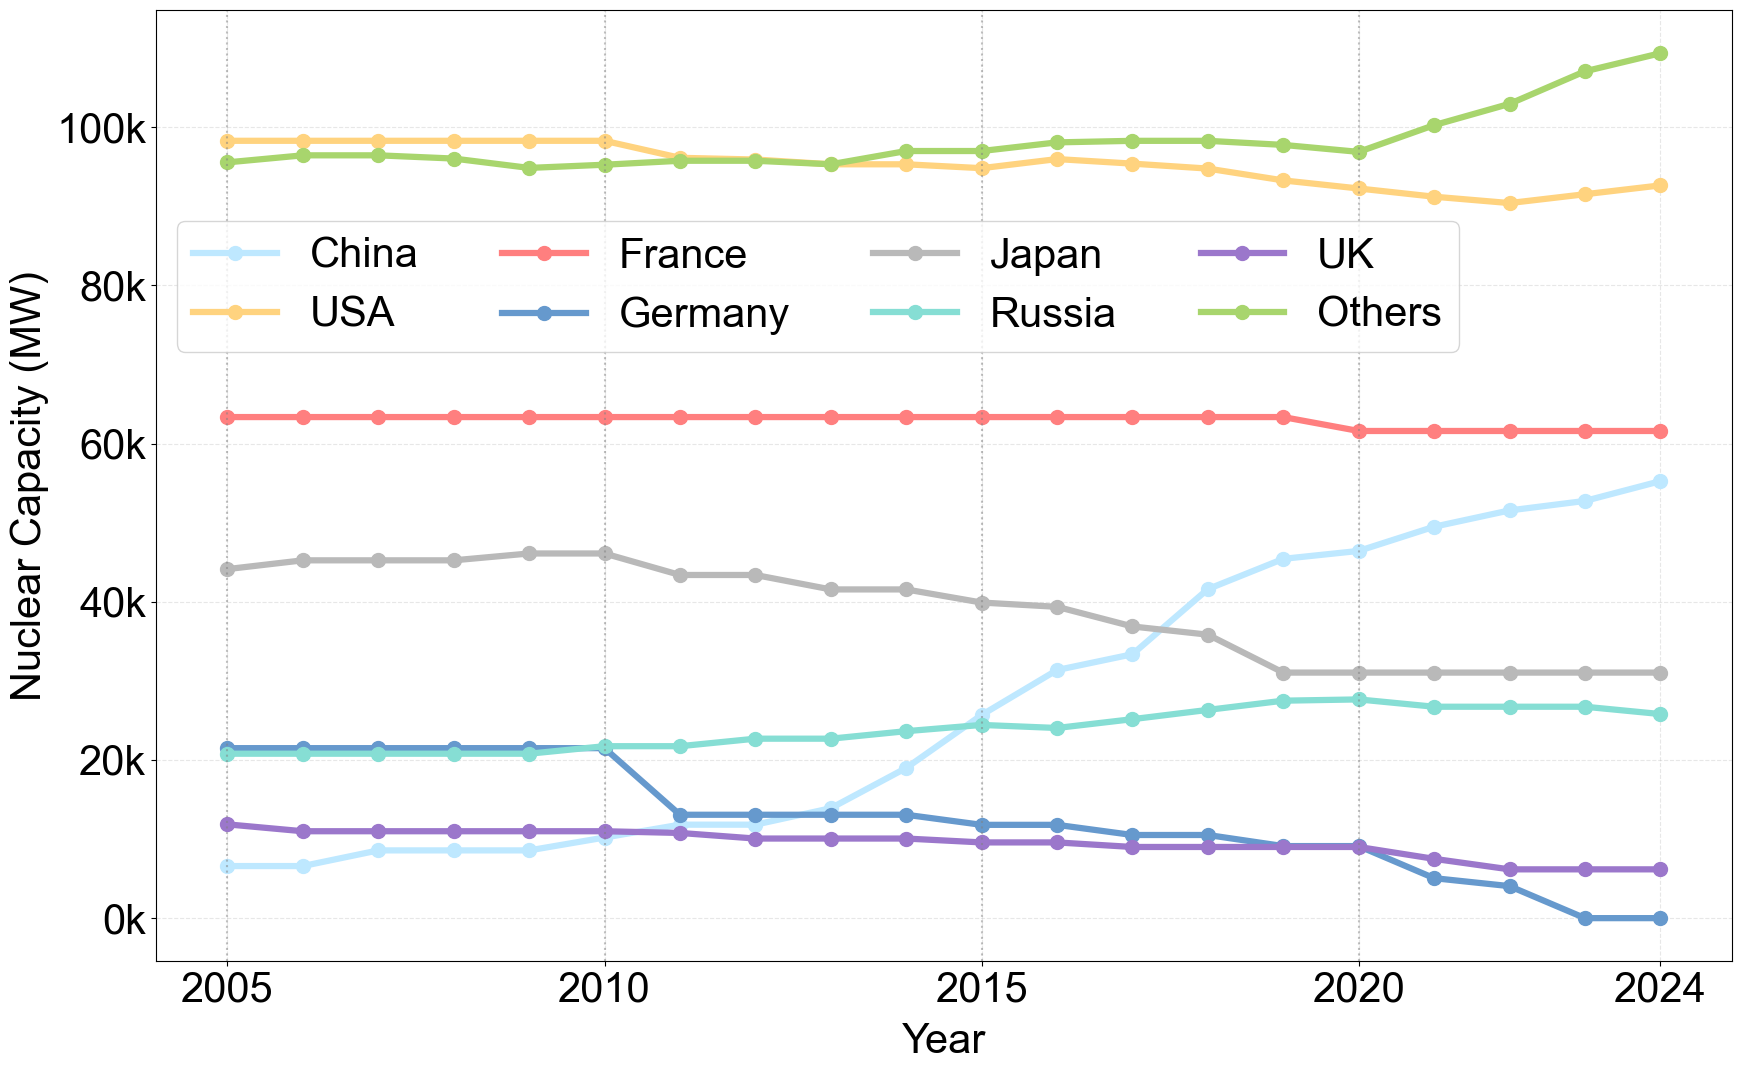

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Base capacity in 2005
base_2005 = {
    'China': 5977 + 610,
    'USA': 98298 + 0,
    'France': 63363 + 0,
    'Germany': 21496 + 0,
    'Japan': 44139 + 0,
    'Russia': 20793 + 0,
    'UK': 12052 - 192,
    'Others': 95849 + 996 - 1275
}

# Raw data for additions and retirements by year
yearly_data = {
    2005: {"new":     [   0,    0,    0,    0, 2392,  950,    0, 2436], "retired": [   0,    0,    0,    0,    0,    0,    0,    0]},
    2006: {"new":     [   0,    0,    0,    0, 1108,    0,    0, 1440], "retired": [   0,    0,    0,    0,    0,    0,  870,  549]},
    2007: {"new":     [1980,    0,    0,    0,    0,    0,    0,    0], "retired": [   0,    0,    0,    0,    0,    0,    0,    0]},
    2008: {"new":     [   0,    0,    0,    0,    0,    0,    0,    0], "retired": [   0,    0,    0,    0,    0,    0,    0,  408]},
    2009: {"new":     [   0,    0,    0,    0,  866,    0,    0,    0], "retired": [   0,    0,    0,    0,    0,    0,    0, 1185]},
    2010: {"new":     [1626,    0,    0,    0,    0,  950,    0,  404], "retired": [   0,    0,    0,    0,    0,    0,    0,    0]},
    2011: {"new":     [1626,    0,    0,    0,    0,    0,    0,  502], "retired": [   0, 2150,    0, 8422, 2719,    0,  217,    0]},
    2012: {"new":     [   0,    0,    0,    0,    0,  950,    0,    0], "retired": [   0,  217,    0,    0,    0,    0,  707,    0]},
    2013: {"new":     [2079,    0,    0,    0,    0,    0,    0,    0], "retired": [   0,  605,    0,    0, 1827,    0,    0,  446]},
    2014: {"new":     [5091,    0,    0,    0,    0,  950,    0, 1677], "retired": [   0,    0,    0,    0,    0,    0,    0,    0]},
    2015: {"new":     [6702,    0,    0,    0,    0,  789,    0,    0], "retired": [   0,  490,    0, 1275, 1659,    0,  490,    0]},
    2016: {"new":     [5680, 1150,    0,    0,    0,    0,    0, 1731], "retired": [   0,    0,    0,    0,  538,  385,    0,  638]},
    2017: {"new":     [2000,    0,    0,    0,    0, 1114,    0, 1245], "retired": [   0,  576,    0, 1284, 2486,    0,  576, 1049]},
    2018: {"new":     [8234,    0,    0,    0,    0, 2096,    0,    0], "retired": [   0,  625,    0,    0, 1036,  925,    0,    0]},
    2019: {"new":     [3830,    0,    0,    0,    0, 1178,    0, 1418], "retired": [   0, 1496,    0, 1402, 4797,   11,    0, 1934]},
    2020: {"new":     [1000,    0,    0,    0,    0, 1085,    0,    0], "retired": [   0, 1020, 1760,    0,    0,  925,    0,  881]},
    2021: {"new":     [3061,    0,    0,    0,    0,    0,    0, 3468], "retired": [   0, 1040,    0, 4058,    0,  925, 1500,   90]},
    2022: {"new":     [2061,    0,    0,    0,    0,    0,    0, 3699], "retired": [   0,  805,    0, 1006,    0,    0, 1330, 1006]},
    2023: {"new":     [1200, 1117,    0,    0,    0,    0,    0, 5124], "retired": [   0,    0,    0, 4049,    0,    0,    0, 1008]},
    2024: {"new":     [2500, 1117,    0,    0,    0,    0,    0, 3315], "retired": [   0,    0,    0,    0,    0,  925,    0, 1030]}
}

# Countries in order
countries = ['China', 'USA', 'France', 'Germany', 'Japan', 'Russia', 'UK', 'Others']
colors = ['#BEE8FF', '#FFD37F', '#FF7F7F', '#6699CD', '#B9B9B9', '#86DED4', '#9B77CB', '#A8D56D']

# Calculate cumulative capacity for each country over time
years = list(range(2005, 2025))
capacity_data = {}

for country in countries:
    capacity_data[country] = []

# Initialize with base 2005 values
for i, country in enumerate(countries):
    current_capacity = base_2005[country]
    capacity_data[country].append(current_capacity)

# Calculate yearly changes
for year in years[1:]:  # Start from 2006
    if year in yearly_data:
        for i, country in enumerate(countries):
            new_capacity = yearly_data[year]['new'][i]
            retired_capacity = yearly_data[year]['retired'][i]
            net_change = new_capacity - retired_capacity
            current_capacity = capacity_data[country][-1] + net_change
            capacity_data[country].append(current_capacity)
    else:
        # If no data for year, keep previous capacity
        for country in countries:
            capacity_data[country].append(capacity_data[country][-1])

# Create figure and axis
fig, ax = plt.subplots(figsize=(18, 11.29))

# Plot lines for each country
for i, country in enumerate(countries):
    ax.plot(years, capacity_data[country], marker='o', linewidth=4.5, 
            markersize=10, label=country, color=colors[i])

# Customize the chart
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Nuclear Capacity (MW)', labelpad=5)

# Set x-axis ticks every 5 years
ax.set_xticks([2005, 2010, 2015, 2020, 2024])
ax.set_xticklabels(['2005', '2010', '2015', '2020', '2024'])

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.8), frameon=True, ncol=len(countries)/2)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Add vertical lines to show 5-year periods
for year in range(2005, 2025, 5):
    ax.axvline(x=year, color='gray', linestyle=':', alpha=0.5)

# Format y-axis to show values in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}k'))

# Add annotations for key events
# ax.annotate('Fukushima\n(2011)', xy=(2011, 44139), xytext=(2011, 50000),
#             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
#             fontsize=10, ha='center', color='red')

# Adjust layout and display
plt.tight_layout()
# plt.show()
plt.savefig('../output/figs/nuclear_capacity_by_country.pdf', bbox_inches='tight')


# Print summary statistics
print("Nuclear Capacity Summary (MW):")
print("-" * 80)
print(f"{'Country':<10} {'2005':<8} {'2010':<8} {'2015':<8} {'2020':<8} {'2024':<8} {'Change':<8}")
print("-" * 80)
for country in countries:
    idx_2005 = 0
    idx_2010 = 5
    idx_2015 = 10
    idx_2020 = 15
    idx_2024 = 19
    change = capacity_data[country][idx_2024] - capacity_data[country][idx_2005]
    print(f"{country:<10} {capacity_data[country][idx_2005]:<8.0f} {capacity_data[country][idx_2010]:<8.0f} "
          f"{capacity_data[country][idx_2015]:<8.0f} {capacity_data[country][idx_2020]:<8.0f} "
          f"{capacity_data[country][idx_2024]:<8.0f} {change:+8.0f}")

Overall Mean Values:
----------------------------------------
case1_npv_usd_no_45u: -1.06e+09
case1_npv_usd_with_45u: -3.19e+08
case2_npv_usd_no_45u: 1.82e+08
case2_npv_usd_with_45u: 6.11e+08
case3_npv_usd: 8.93e+08

Region-wise Mean Values:
----------------------------------------

CAISO:
  case1_npv_usd_no_45u: -6.49e+08
  case1_npv_usd_with_45u: -1.35e+08
  case2_npv_usd_no_45u: 5.16e+08
  case2_npv_usd_with_45u: 1.04e+09
  case3_npv_usd: 8.76e+08

ERCOT:
  case1_npv_usd_no_45u: -1.93e+09
  case1_npv_usd_with_45u: -1.00e+09
  case2_npv_usd_no_45u: -2.95e+08
  case2_npv_usd_with_45u: 1.71e+08
  case3_npv_usd: 1.04e+09

ISONE:
  case1_npv_usd_no_45u: 6.79e+06
  case1_npv_usd_with_45u: 5.85e+08
  case2_npv_usd_no_45u: 7.15e+08
  case2_npv_usd_with_45u: 1.27e+09
  case3_npv_usd: 6.83e+08

MISO:
  case1_npv_usd_no_45u: -1.45e+09
  case1_npv_usd_with_45u: -5.87e+08
  case2_npv_usd_no_45u: -7.69e+07
  case2_npv_usd_with_45u: 3.37e+08
  case3_npv_usd: 9.20e+08

NYISO:
  case1_npv_usd_no_45u

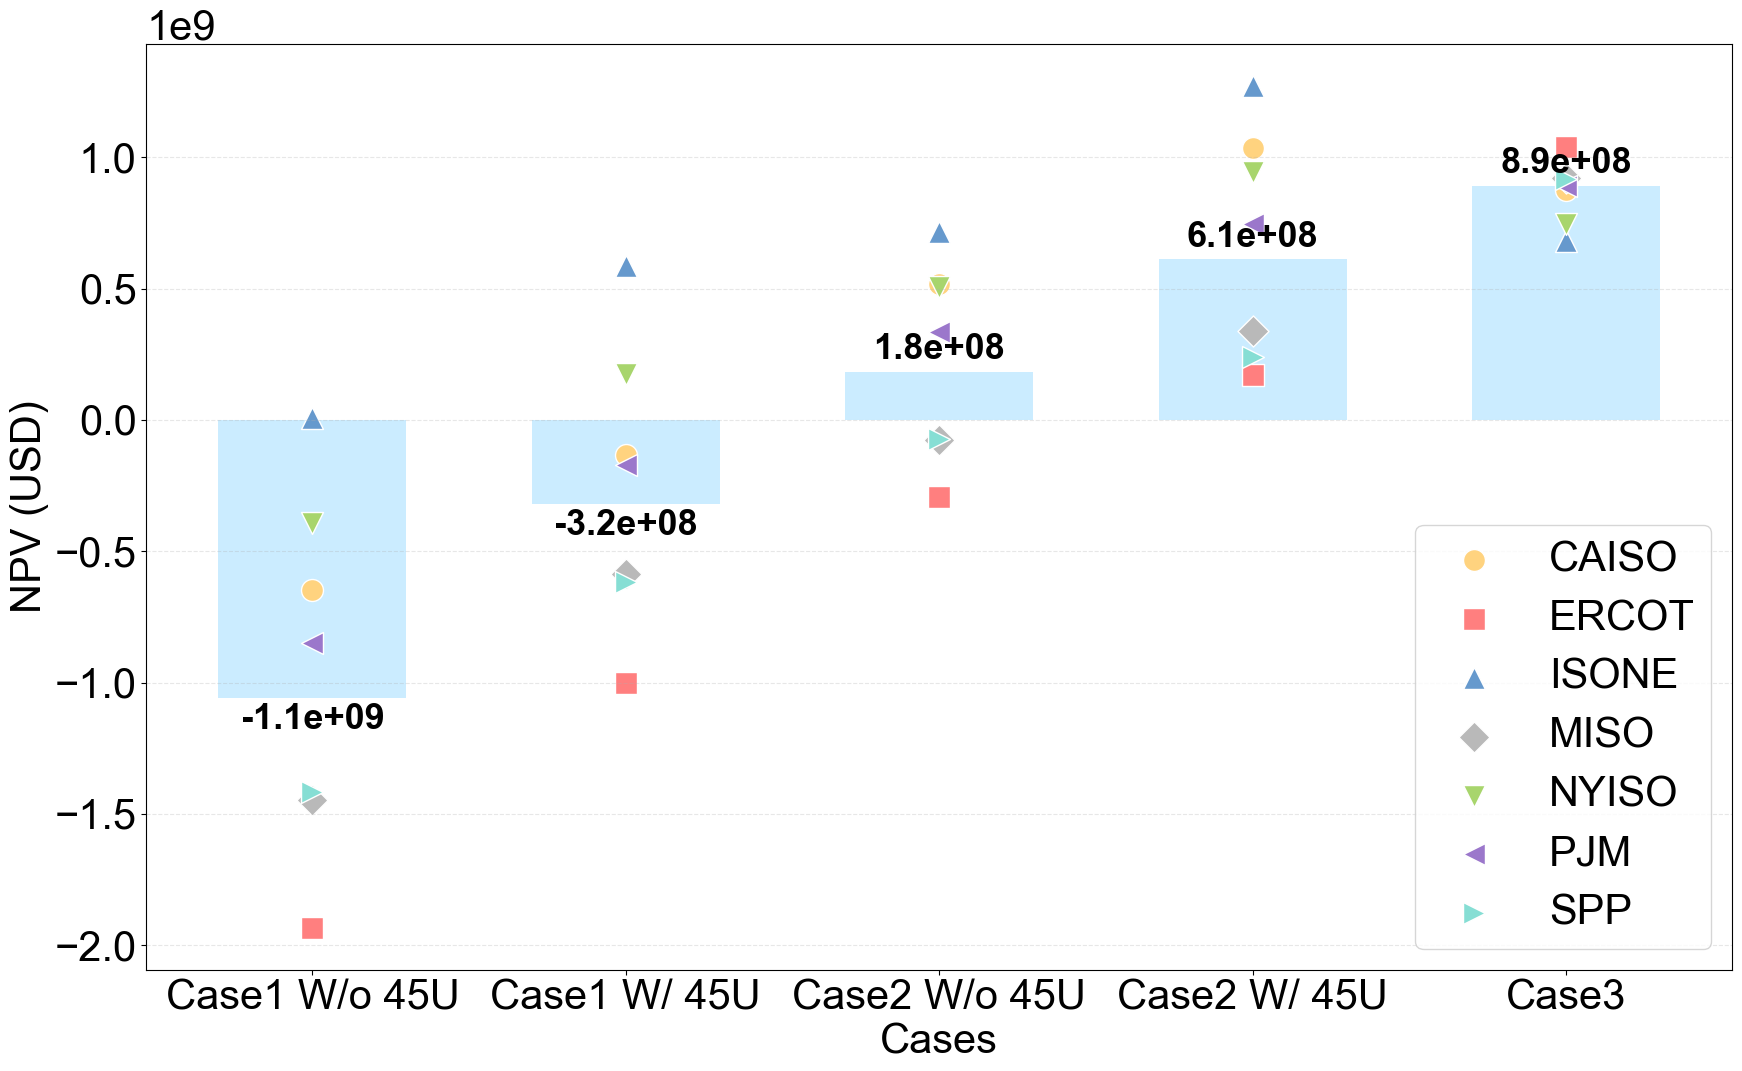

In [ ]:
df = pd.read_excel('plotting data.xlsx', sheet_name='Cases NPV')

data_columns = ['case1_npv_usd_no_45u', 'case1_npv_usd_with_45u', 
                'case2_npv_usd_no_45u', 'case2_npv_usd_with_45u', 'case3_npv_usd']

overall_means = df[data_columns].mean()

region_means = df.groupby('iso_region')[data_columns].mean()

plt.figure(figsize=(18, 11.29))

x = np.arange(len(data_columns))
width = 0.6

colors = ['#BEE8FF', '#FFD37F', '#FF7F7F', '#6699CD', '#B9B9B9', '#A8D56D', '#9B77CB', '#86DED4']

bars = plt.bar(x, overall_means.values, width, alpha=0.8, color=colors[0]
               )

markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
region_colors = colors[1:]

for i, col in enumerate(data_columns):
    for j, (region, row) in enumerate(region_means.iterrows()):
        plt.scatter(i, row[col], 
                    marker=markers[j % len(markers)], 
                    color=region_colors[j % len(region_colors)], 
                    s=250, 
                    edgecolor='white', 
                    linewidth=1,
                    label=region if i == 0 else "")

plt.xlabel('Cases')
plt.ylabel('NPV (USD)')

labels = ['Case1 W/o 45U', 'Case1 W/ 45U', 'Case2 W/o 45U', 'Case2 W/ 45U', 'Case3']
plt.xticks(x, labels)

plt.grid(axis='y', alpha=0.3, linestyle='--')


ax = plt.gca()
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

offset = overall_means.abs().max() * 0.02

for bar in bars:
    height = bar.get_height()
    
    if height >= 0:
        y_pos = height + offset
        va = 'bottom'
    else:
        y_pos = height - offset
        va = 'top'
        
    plt.text(bar.get_x() + bar.get_width() / 2,
             y_pos,                            
             f'{height:.1e}',                  
             ha='center',                      
             va=va,                            
             fontweight='bold')

plt.legend(loc='best', frameon=True, ncol=1)

plt.tight_layout()

plt.show()
# plt.savefig('../output/figs/npv_cases.pdf', bbox_inches='tight')

print("Overall Mean Values:")
print("-" * 40)
for col, mean_val in overall_means.items():
    print(f"{col}: {mean_val:.2e}")

print("\nRegion-wise Mean Values:")
print("-" * 40)
for region in region_means.index:
    print(f"\n{region}:")
    for col in data_columns:
        print(f"  {col}: {region_means.loc[region, col]:.2e}")


Overall Mean Values:
----------------------------------------
case1_npv_usd_no_45u: -1.06e+09
case1_npv_usd_with_45u: -3.19e+08
case2_npv_usd_no_45u: 1.82e+08
case2_npv_usd_with_45u: 6.11e+08

Region-wise Mean Values:
----------------------------------------

CAISO:
  case1_npv_usd_no_45u: -6.49e+08
  case1_npv_usd_with_45u: -1.35e+08
  case2_npv_usd_no_45u: 5.16e+08
  case2_npv_usd_with_45u: 1.04e+09

ERCOT:
  case1_npv_usd_no_45u: -1.93e+09
  case1_npv_usd_with_45u: -1.00e+09
  case2_npv_usd_no_45u: -2.95e+08
  case2_npv_usd_with_45u: 1.71e+08

ISONE:
  case1_npv_usd_no_45u: 6.79e+06
  case1_npv_usd_with_45u: 5.85e+08
  case2_npv_usd_no_45u: 7.15e+08
  case2_npv_usd_with_45u: 1.27e+09

MISO:
  case1_npv_usd_no_45u: -1.45e+09
  case1_npv_usd_with_45u: -5.87e+08
  case2_npv_usd_no_45u: -7.69e+07
  case2_npv_usd_with_45u: 3.37e+08

NYISO:
  case1_npv_usd_no_45u: -3.94e+08
  case1_npv_usd_with_45u: 1.76e+08
  case2_npv_usd_no_45u: 5.07e+08
  case2_npv_usd_with_45u: 9.43e+08

PJM:
  case1

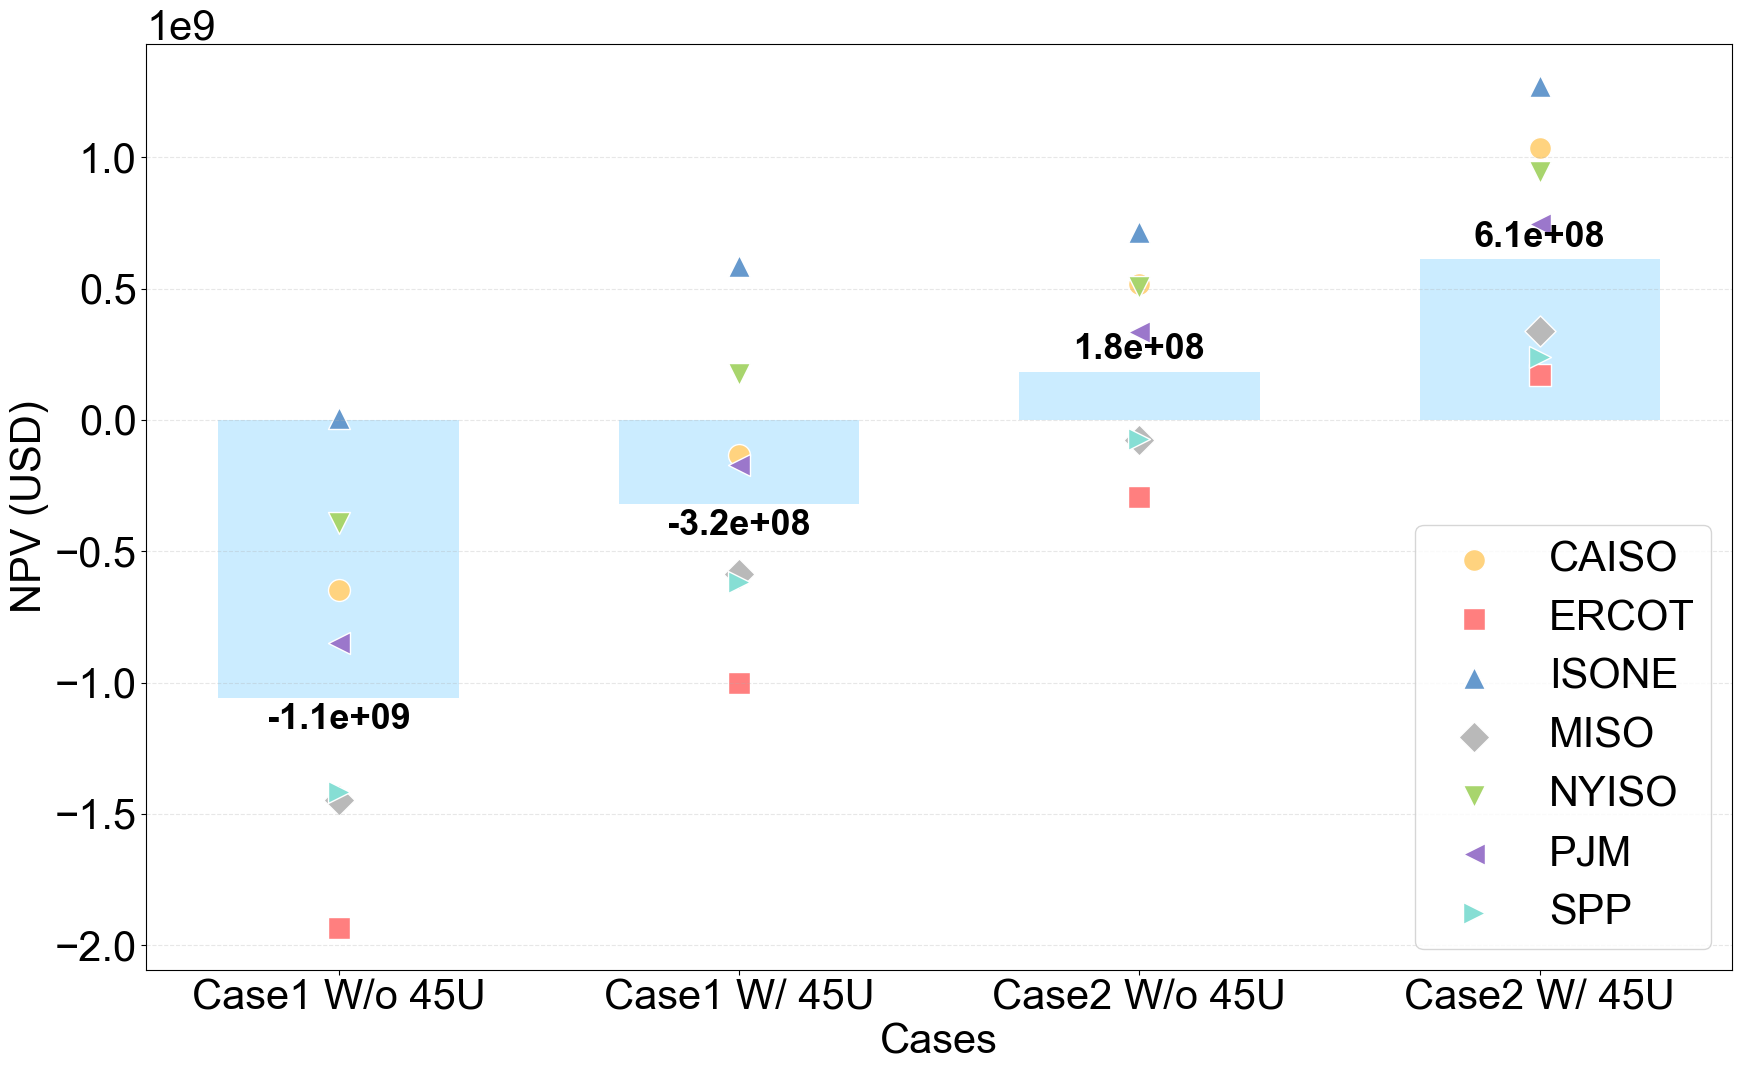

In [5]:
df = pd.read_excel('plotting data.xlsx', sheet_name='Cases NPV')

data_columns = ['case1_npv_usd_no_45u', 'case1_npv_usd_with_45u', 
                'case2_npv_usd_no_45u', 'case2_npv_usd_with_45u']

overall_means = df[data_columns].mean()

region_means = df.groupby('iso_region')[data_columns].mean()

plt.figure(figsize=(18, 11.29))

x = np.arange(len(data_columns))
width = 0.6

colors = ['#BEE8FF', '#FFD37F', '#FF7F7F', '#6699CD', '#B9B9B9', '#A8D56D', '#9B77CB', '#86DED4']

bars = plt.bar(x, overall_means.values, width, alpha=0.8, color=colors[0]
               )

markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
region_colors = colors[1:]

for i, col in enumerate(data_columns):
    for j, (region, row) in enumerate(region_means.iterrows()):
        plt.scatter(i, row[col], 
                    marker=markers[j % len(markers)], 
                    color=region_colors[j % len(region_colors)], 
                    s=250, 
                    edgecolor='white', 
                    linewidth=1,
                    label=region if i == 0 else "")

plt.xlabel('Cases')
plt.ylabel('NPV (USD)')

labels = ['Case1 W/o 45U', 'Case1 W/ 45U', 'Case2 W/o 45U', 'Case2 W/ 45U']
plt.xticks(x, labels)

plt.grid(axis='y', alpha=0.3, linestyle='--')


ax = plt.gca()
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

offset = overall_means.abs().max() * 0.02

for bar in bars:
    height = bar.get_height()
    
    if height >= 0:
        y_pos = height + offset
        va = 'bottom'
    else:
        y_pos = height - offset
        va = 'top'
        
    plt.text(bar.get_x() + bar.get_width() / 2,
             y_pos,                            
             f'{height:.1e}',                  
             ha='center',                      
             va=va,                            
             fontweight='bold')

plt.legend(loc='best', frameon=True, ncol=1)

plt.tight_layout()

# plt.show()
plt.savefig('../output/figs/npv_cases.pdf', bbox_inches='tight')

print("Overall Mean Values:")
print("-" * 40)
for col, mean_val in overall_means.items():
    print(f"{col}: {mean_val:.2e}")

print("\nRegion-wise Mean Values:")
print("-" * 40)
for region in region_means.index:
    print(f"\n{region}:")
    for col in data_columns:
        print(f"  {col}: {region_means.loc[region, col]:.2e}")


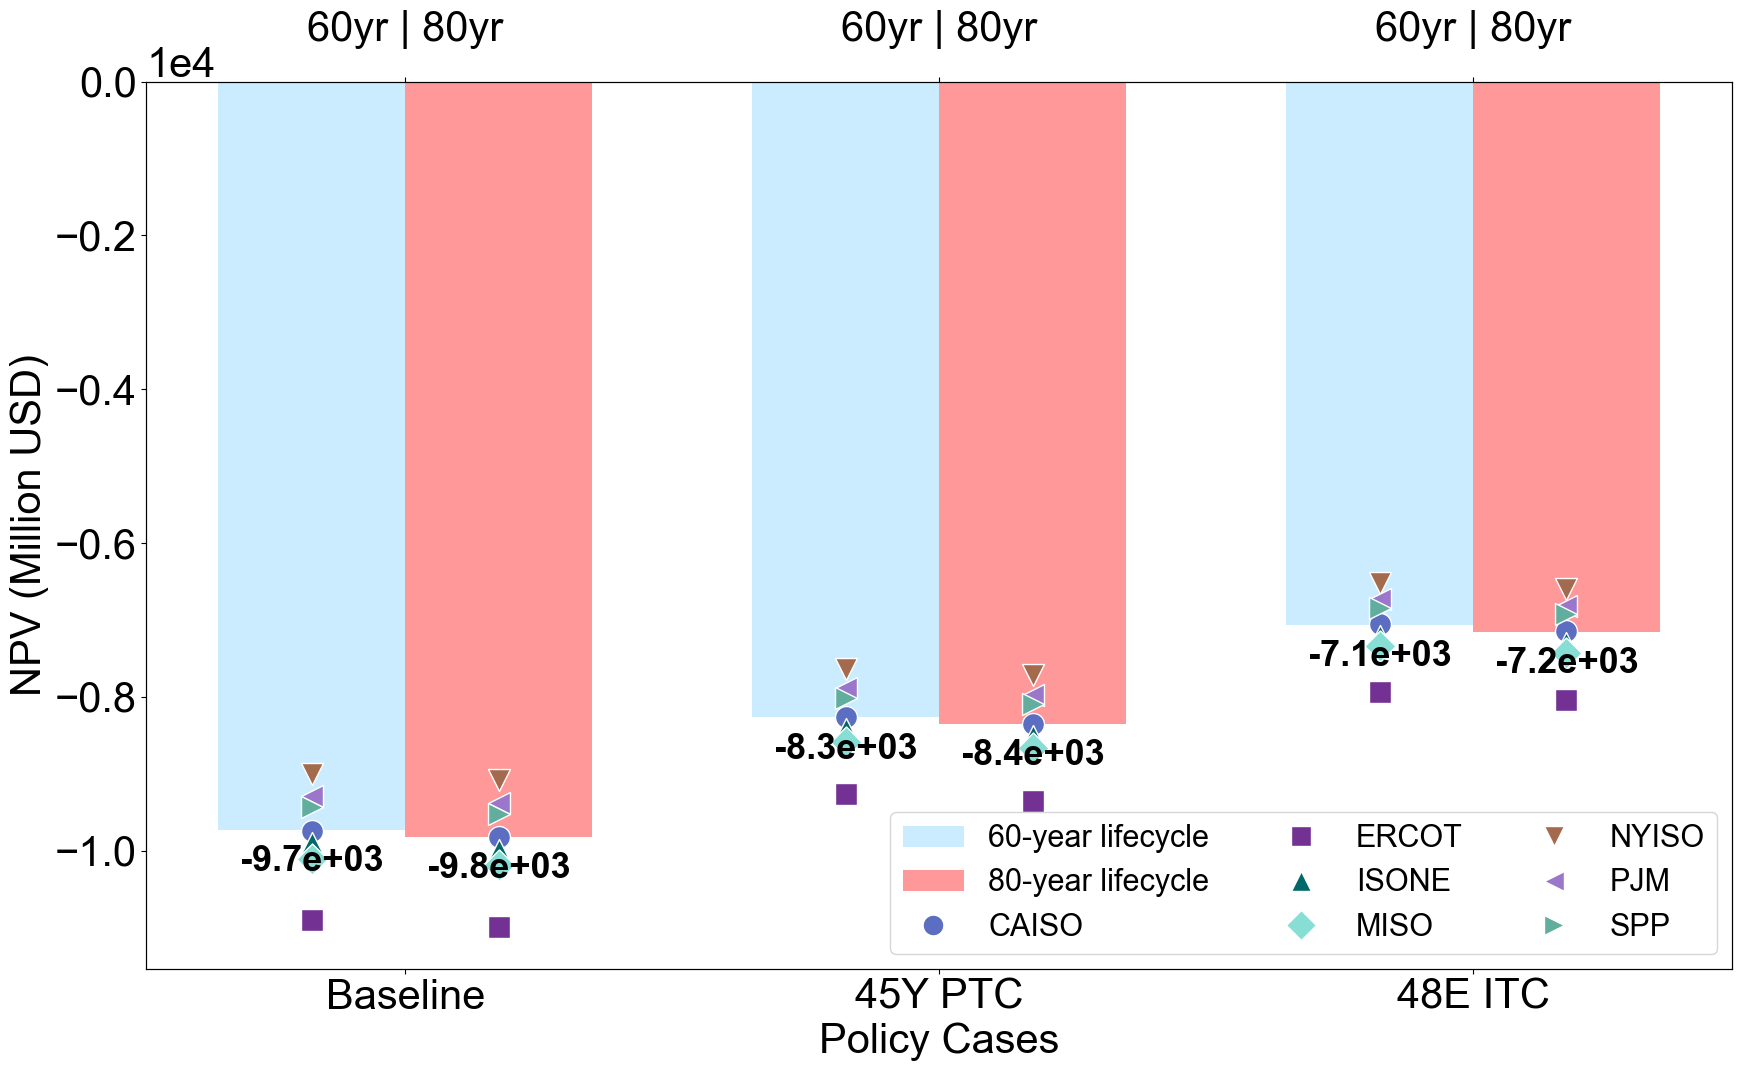

60-Year Lifecycle Mean Values:
--------------------------------------------------
greenfield_60_yr_baseline_npv_m_usd: -9.73e+03
greenfield_60_yr_45y_ptc_npv_m_usd: -8.27e+03
greenfield_60_yr_48e_itc_npv_m_usd: -7.07e+03

80-Year Lifecycle Mean Values:
--------------------------------------------------
greenfield_80_yr_baseline_npv_m_usd: -9.82e+03
greenfield_80_yr_45y_ptc_npv_m_usd: -8.35e+03
greenfield_80_yr_48e_itc_npv_m_usd: -7.15e+03

Region-wise Mean Values (60-Year):
--------------------------------------------------

CAISO:
  greenfield_60_yr_baseline_npv_m_usd: -9.74e+03
  greenfield_60_yr_45y_ptc_npv_m_usd: -8.27e+03
  greenfield_60_yr_48e_itc_npv_m_usd: -7.06e+03

ERCOT:
  greenfield_60_yr_baseline_npv_m_usd: -1.09e+04
  greenfield_60_yr_45y_ptc_npv_m_usd: -9.26e+03
  greenfield_60_yr_48e_itc_npv_m_usd: -7.94e+03

ISONE:
  greenfield_60_yr_baseline_npv_m_usd: -9.90e+03
  greenfield_60_yr_45y_ptc_npv_m_usd: -8.42e+03
  greenfield_60_yr_48e_itc_npv_m_usd: -7.21e+03

MISO:
  gr

In [ ]:

# Read Excel file
df = pd.read_excel('plotting data.xlsx', sheet_name='6080 NPV')

# Data columns organized by policy type
data_columns_60 = ['greenfield_60_yr_baseline_npv_m_usd', 'greenfield_60_yr_45y_ptc_npv_m_usd', 'greenfield_60_yr_48e_itc_npv_m_usd']
data_columns_80 = ['greenfield_80_yr_baseline_npv_m_usd', 'greenfield_80_yr_45y_ptc_npv_m_usd', 'greenfield_80_yr_48e_itc_npv_m_usd']

# Calculate overall means
overall_means_60 = df[data_columns_60].mean()
overall_means_80 = df[data_columns_80].mean()

# Calculate region means
region_means_60 = df.groupby('iso_region')[data_columns_60].mean()
region_means_80 = df.groupby('iso_region')[data_columns_80].mean()

# Set up the figure
plt.figure(figsize=(18, 11.29))

# Define colors
full_color_list = [
    "#BEE8FF", "#FFD37F", "#FF7F7F",
    "#036868", "#9B77CB", "#86DED4", "#723193",
    "#5B6EC1", "#62AE9E", "#A46A4D",
    "#3677CE", "#A8D56D", "#224686", "#29BD9A", "#63C0EF", "#A6D1FD", "#6699CD", "#B9B9B9",
    "#CC3300", "#D8A46A", "#663300", "#E86718", "#FFC431"
]
color_60 = full_color_list[0]  # Blue for 60-year
color_80 = full_color_list[2]  # Darker blue for 80-year

# Set up bar positions
n_policies = 3
x_base = np.arange(n_policies)
width = 0.35

# Create bars for 60-year and 80-year side by side
bars_60 = plt.bar(x_base - width/2, overall_means_60.values, width, 
                  alpha=0.8, color=color_60, label='60-year lifecycle')
bars_80 = plt.bar(x_base + width/2, overall_means_80.values, width, 
                  alpha=0.8, color=color_80, label='80-year lifecycle')

# Set up markers for regions
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
region_colors = full_color_list[3:]  # Skip the first 4 colors used for bars

# Get unique regions for consistent coloring
regions = df['iso_region'].unique()
region_color_map = {region: region_colors[i % len(region_colors)] for i, region in enumerate(regions)}

# Add region data points for 60-year data
for i, col in enumerate(data_columns_60):
    for j, (region, row) in enumerate(region_means_60.iterrows()):
        plt.scatter(i - width/2, row[col],
                    marker=markers[j % len(markers)],
                    color=region_color_map[region],
                    s=250,
                    edgecolor='white',
                    linewidth=1,
                    label=region if i == 0 else "")

# Add region data points for 80-year data
for i, col in enumerate(data_columns_80):
    for j, (region, row) in enumerate(region_means_80.iterrows()):
        plt.scatter(i + width/2, row[col],
                    marker=markers[j % len(markers)],
                    color=region_color_map[region],
                    s=250,
                    edgecolor='white',
                    linewidth=1)

# Set labels and formatting
plt.xlabel('Policy Cases')
plt.ylabel('NPV (Million USD)')

# Create custom x-axis labels
policy_labels = ['Baseline', '45Y PTC', '48E ITC']
plt.xticks(x_base, policy_labels)

# Add secondary x-axis labels for lifecycle indication
ax = plt.gca()
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(x_base)
ax2.set_xticklabels(['60yr | 80yr', '60yr | 80yr', '60yr | 80yr'])
ax2.tick_params(axis='x', which='major', pad=20)

# Add grid
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Format y-axis to scientific notation
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Add value labels on top of bars
all_values = list(overall_means_60.values) + list(overall_means_80.values)
offset = max(abs(val) for val in all_values) * 0.02

# Labels for 60-year bars
for bar in bars_60:
    height = bar.get_height()
    if height >= 0:
        y_pos = height + offset
        va = 'bottom'
    else:
        y_pos = height - offset
        va = 'top'
    
    plt.text(bar.get_x() + bar.get_width() / 2,
             y_pos,
             f'{height:.1e}',
             ha='center',
             va=va,
             fontweight='bold')

# Labels for 80-year bars
for bar in bars_80:
    height = bar.get_height()
    if height >= 0:
        y_pos = height + offset
        va = 'bottom'
    else:
        y_pos = height - offset
        va = 'top'
    
    plt.text(bar.get_x() + bar.get_width() / 2,
             y_pos,
             f'{height:.1e}',
             ha='center',
             va=va,
             fontweight='bold')

# Create legend handles manually
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = []

# Add lifecycle legend
legend_elements.append(Patch(facecolor=color_60, alpha=0.8, label='60-year lifecycle'))
legend_elements.append(Patch(facecolor=color_80, alpha=0.8, label='80-year lifecycle'))

# Add region legend
for j, (region, row) in enumerate(region_means_60.iterrows()):
    legend_elements.append(Line2D([0], [0], marker=markers[j % len(markers)], color='w',
                                  markerfacecolor=region_color_map[region], markersize=15,
                                  markeredgecolor='white', markeredgewidth=1, label=region))

# Set legend
plt.legend(handles=legend_elements, loc='lower right', frameon=True, ncol=3, fontsize=22)

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('../output/figs/npv_6080_comparison.pdf', bbox_inches='tight')
plt.show()

# Print statistical information
print("60-Year Lifecycle Mean Values:")
print("-" * 50)
for col, mean_val in overall_means_60.items():
    print(f"{col}: {mean_val:.2e}")

print("\n80-Year Lifecycle Mean Values:")
print("-" * 50)
for col, mean_val in overall_means_80.items():
    print(f"{col}: {mean_val:.2e}")

print("\nRegion-wise Mean Values (60-Year):")
print("-" * 50)
for region in region_means_60.index:
    print(f"\n{region}:")
    for col in data_columns_60:
        print(f"  {col}: {region_means_60.loc[region, col]:.2e}")

print("\nRegion-wise Mean Values (80-Year):")
print("-" * 50)
for region in region_means_80.index:
    print(f"\n{region}:")
    for col in data_columns_80:
        print(f"  {region_means_80.loc[region, col]:.2e}")

LCOH Breakdown Summary:
------------------------------------------------------------------------------------------
ISO Region      Capital Recovery Capex Electricity Costs  Fixed OM   Variable Opex   Others     Total LCOH
------------------------------------------------------------------------------------------
CAISO           $0.64                  $1.55              $0.17      $0.34           $0.07      $2.78     
ERCOT           $0.59                  $1.18              $0.18      $0.34           $0.13      $2.42     
ISONE           $0.75                  $1.79              $0.17      $0.34           $0.09      $3.14     
MISO            $0.70                  $1.21              $0.17      $0.34           $0.10      $2.52     
NYISO           $0.79                  $1.61              $0.17      $0.34           $0.07      $2.98     
PJM             $0.79                  $1.40              $0.18      $0.34           $0.06      $2.77     
SPP             $0.73                  $1.15 

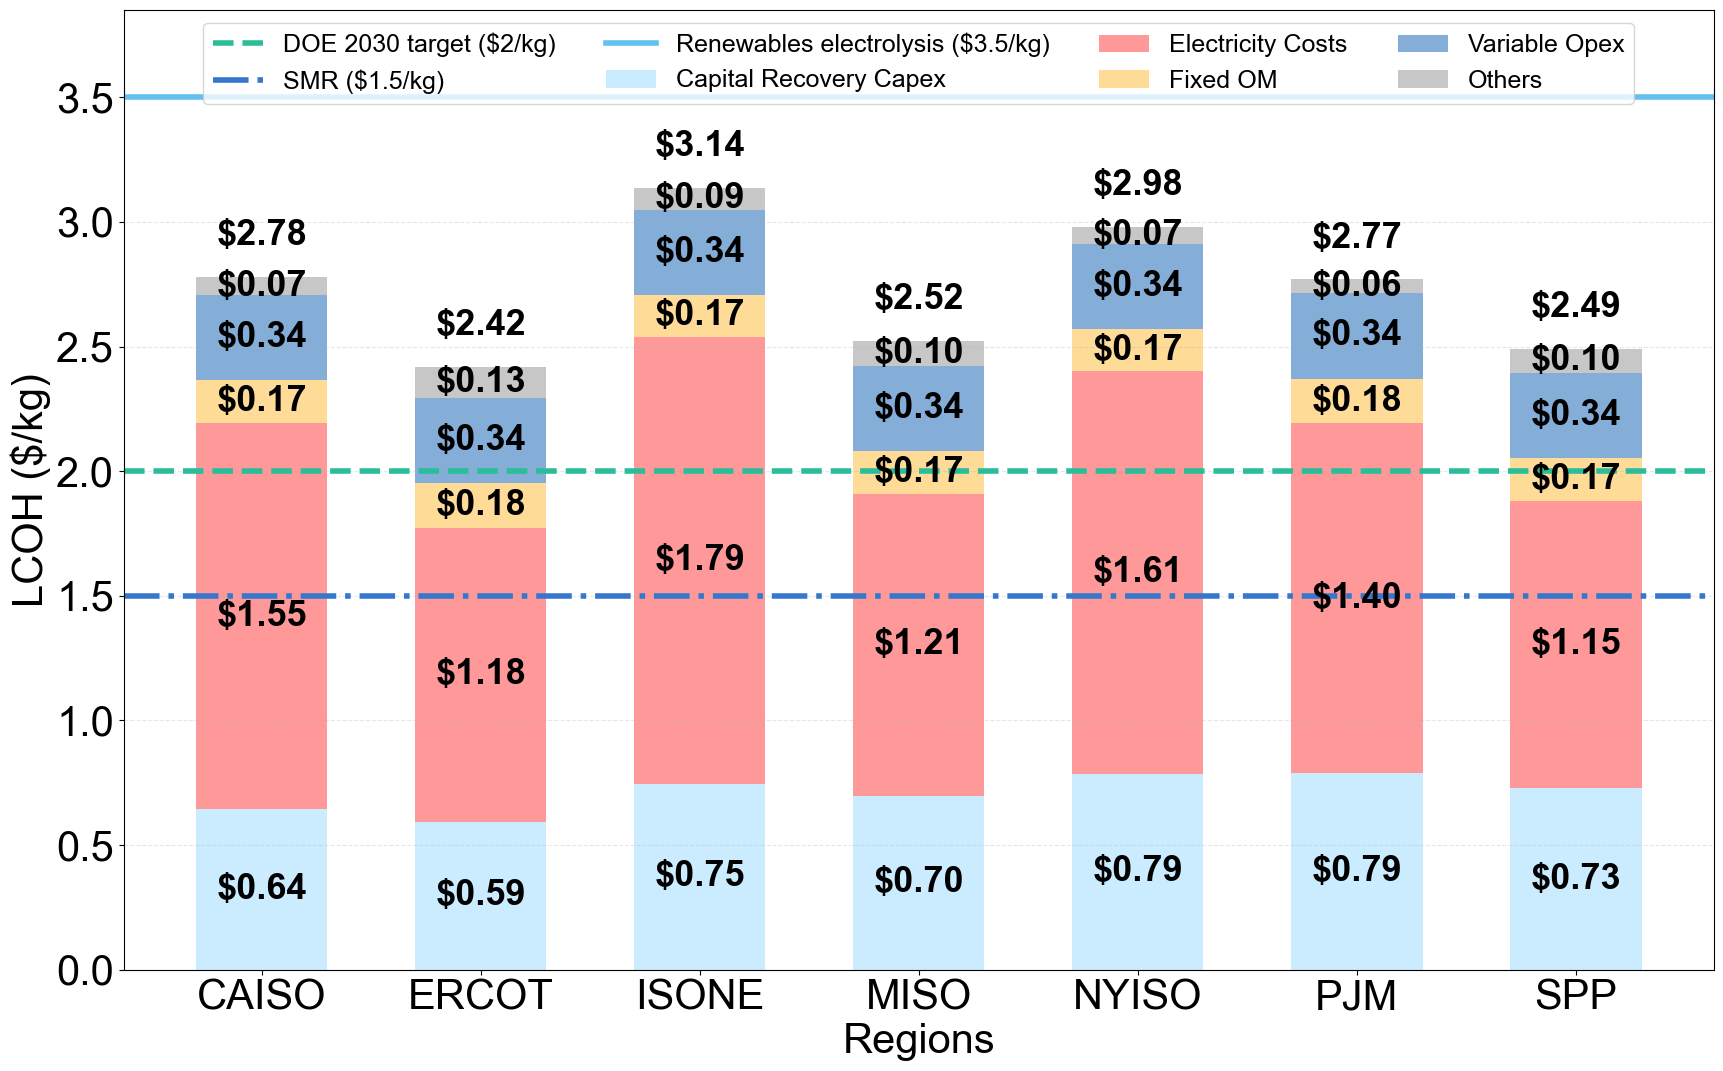

In [ ]:

# Read data from Excel
df = pd.read_excel('plotting data.xlsx', sheet_name='LCOH BD')

# Group by iso_region and calculate averages
columns = ['total_lcoh_detailed', 'lcoh_capital_recovery_capex', 'lcoh_electricity_costs', 'lcoh_fixed_om_category', 'lcoh_variable_opex']
grouped = df.groupby('iso_region')[columns].mean()

# Calculate Others
grouped['others'] = grouped['total_lcoh_detailed'] - (grouped['lcoh_capital_recovery_capex'] + grouped['lcoh_electricity_costs'] + grouped['lcoh_fixed_om_category'] + grouped['lcoh_variable_opex'])

# Data for plotting
regions = grouped.index.tolist()
capital_recovery_capex = grouped['lcoh_capital_recovery_capex'].tolist()
electricity_costs = grouped['lcoh_electricity_costs'].tolist()
fixed_om = grouped['lcoh_fixed_om_category'].tolist()
variable_opex = grouped['lcoh_variable_opex'].tolist()
others = grouped['others'].tolist()
total_lcoh = grouped['total_lcoh_detailed'].tolist()

# Reference values
doe_2030 = 2
smr = 1.5
renewables_electrolysis = 3.5

# Colors for stacked bars
stack_colors = ['#BEE8FF', '#FFD37F', '#FF7F7F', '#6699CD', '#B9B9B9']

# Create figure and axis
fig, ax = plt.subplots(figsize=(18, 11.29))

# Create stacked bar chart
x = np.arange(len(regions))
width = 0.6

# Create stacked bars
bottom = np.zeros(len(regions))
bars1 = ax.bar(x, capital_recovery_capex, width, bottom=bottom, label='Capital Recovery Capex', color=stack_colors[0], alpha=0.8)
bottom += np.array(capital_recovery_capex)
bars2 = ax.bar(x, electricity_costs, width, bottom=bottom, label='Electricity Costs', color=stack_colors[2], alpha=0.8)
bottom += np.array(electricity_costs)
bars3 = ax.bar(x, fixed_om, width, bottom=bottom, label='Fixed OM', color=stack_colors[1], alpha=0.8)
bottom += np.array(fixed_om)
bars4 = ax.bar(x, variable_opex, width, bottom=bottom, label='Variable Opex', color=stack_colors[3], alpha=0.8)
bottom += np.array(variable_opex)
bars5 = ax.bar(x, others, width, bottom=bottom, label='Others', color=stack_colors[4], alpha=0.8)

# Add horizontal reference lines
ax.axhline(y=doe_2030, color='#29BD9A', linestyle='--', linewidth=4, label='DOE 2030 target ($2/kg)')
ax.axhline(y=smr, color='#3677CE', linestyle='-.', linewidth=4, label='SMR ($1.5/kg)')
ax.axhline(y=renewables_electrolysis, color='#63C0EF', linestyle='-', linewidth=4, label='Renewables electrolysis ($3.5/kg)')

# Customize the chart
ax.set_xlabel('Regions')
ax.set_ylabel('LCOH ($/kg)')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(regions)

# Add legend
ax.legend(loc='upper center', frameon=True, ncol=4, fontsize=18)

# Add grid
ax.grid(True, axis='y', alpha=0.3, linestyle='--')

# Add total LCOH value labels on top of bars
for i, total in enumerate(total_lcoh):
    ax.text(x[i], total + 0.1, f'${total:.2f}', 
            ha='center', va='bottom', fontweight='bold')

# Add component value labels within each segment
cum_bottom = np.zeros(len(regions))
for j, component in enumerate([capital_recovery_capex, electricity_costs, fixed_om, variable_opex, others]):
    for i in range(len(regions)):
        if component[i] > 0:  # Only add label if value is positive
            ax.text(x[i], cum_bottom[i] + component[i]/2, f'${component[i]:.2f}', 
                    ha='center', va='center', fontweight='bold', color='black')
    cum_bottom += np.array(component)

# Set y-axis limits to show all data and reference lines clearly
max_y = max(max(total_lcoh), doe_2030, smr, renewables_electrolysis)
ax.set_ylim(0, max_y * 1.1)

# Adjust layout and display
plt.tight_layout()
# plt.show()
plt.savefig('../output/figs/LCOH_by_region.pdf', bbox_inches='tight')

# Print the data for reference
print("LCOH Breakdown Summary:")
print("-" * 90)
print(f"{'ISO Region':<15} {'Capital Recovery Capex':<22} {'Electricity Costs':<18} {'Fixed OM':<10} {'Variable Opex':<15} {'Others':<10} {'Total LCOH':<10}")
print("-" * 90)
for i, region in enumerate(regions):
    print(f"{region:<15} ${capital_recovery_capex[i]:<21.2f} ${electricity_costs[i]:<17.2f} ${fixed_om[i]:<9.2f} ${variable_opex[i]:<14.2f} ${others[i]:<9.2f} ${total_lcoh[i]:<9.2f}")
print("-" * 90)
print(f"DOE 2030 target: ${doe_2030}/kg")
print(f"SMR: ${smr}/kg")
print(f"Renewables electrolysis: ${renewables_electrolysis}/kg")

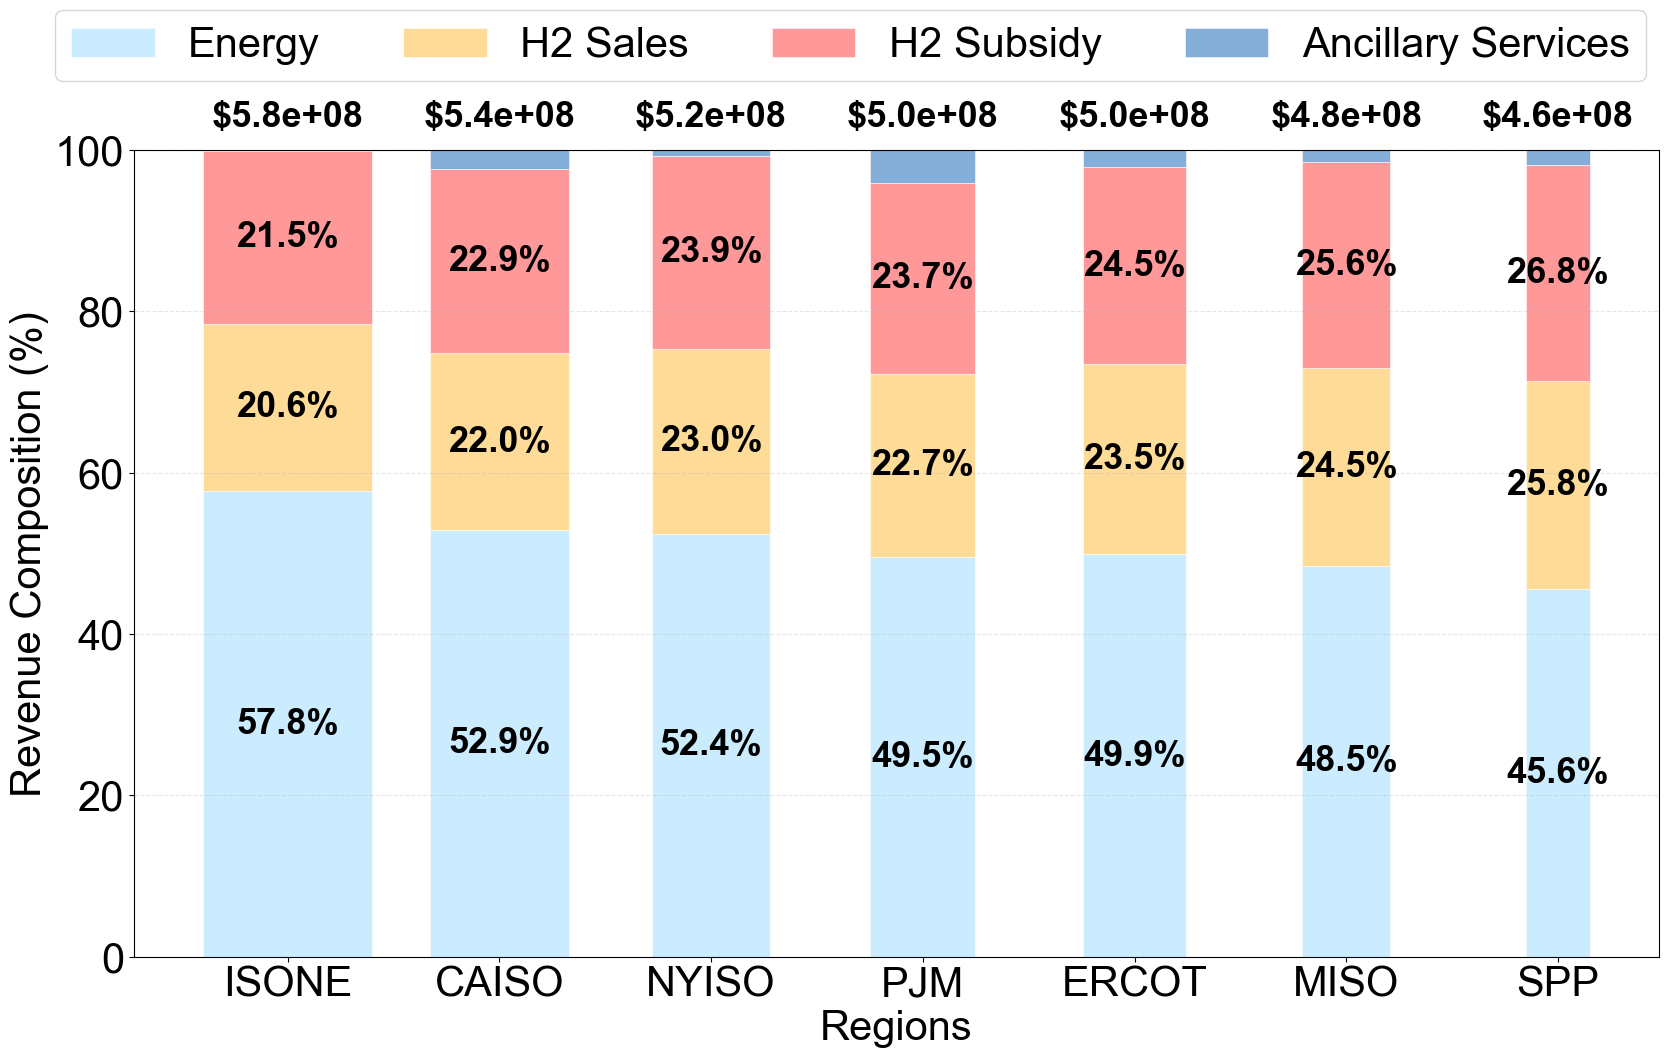

Revenue Breakdown by Region (Absolute Values):

ISONE (Total: $5.78e+08):
----------------------------------------
  Energy Revenue: $3.34e+08 (57.8%)
  H2 Sales Revenue: $1.19e+08 (20.6%)
  H2 Subsidy Revenue: $1.24e+08 (21.5%)
  Ancillary Services Revenue: $5.21e+05 (0.1%)

CAISO (Total: $5.44e+08):
----------------------------------------
  Energy Revenue: $2.87e+08 (52.9%)
  H2 Sales Revenue: $1.19e+08 (22.0%)
  H2 Subsidy Revenue: $1.24e+08 (22.9%)
  Ancillary Services Revenue: $1.26e+07 (2.3%)

NYISO (Total: $5.19e+08):
----------------------------------------
  Energy Revenue: $2.72e+08 (52.4%)
  H2 Sales Revenue: $1.19e+08 (23.0%)
  H2 Subsidy Revenue: $1.24e+08 (23.9%)
  Ancillary Services Revenue: $3.79e+06 (0.7%)

PJM (Total: $5.04e+08):
----------------------------------------
  Energy Revenue: $2.50e+08 (49.5%)
  H2 Sales Revenue: $1.14e+08 (22.7%)
  H2 Subsidy Revenue: $1.19e+08 (23.7%)
  Ancillary Services Revenue: $2.05e+07 (4.1%)

ERCOT (Total: $5.03e+08):
------------

In [ ]:

# Read Excel file
df = pd.read_excel('plotting data.xlsx', sheet_name='Revenue BD')

# Revenue component columns
revenue_columns = ['energy_revenue', 'h2_sales_revenue', 'h2_subsidy_revenue', 'ancillary_services_revenue']

# Calculate region means
region_means = df.groupby('iso_region')[revenue_columns].mean()

# Calculate total revenue for each region
region_totals = region_means.sum(axis=1)

# Calculate percentage for each component
region_percentages = region_means.div(region_totals, axis=0) * 100

# Sort regions by total revenue (descending)
sorted_regions = region_totals.sort_values(ascending=False)

# Define colors for revenue components
full_color_list = [
    "#BEE8FF", "#FFD37F", "#FF7F7F", "#6699CD", "#B9B9B9",
    "#CC3300", "#D8A46A", "#663300", "#E86718", "#FFC431", "#A46A4D",
    "#3677CE", "#A8D56D", "#224686", "#29BD9A", "#63C0EF",
    "#036868", "#9B77CB", "#86DED4", "#723193",
    "#5B6EC1", "#62AE9E", "#A6D1FD"
]

# Use distinct colors for each revenue component
component_colors = {
    'energy_revenue': full_color_list[0],
    'h2_sales_revenue': full_color_list[1], 
    'h2_subsidy_revenue': full_color_list[2],
    'ancillary_services_revenue': full_color_list[3]
}

# Set up the figure
plt.figure(figsize=(18, 11.29))

# Calculate bar widths based on total revenue (normalized)
max_total = sorted_regions.max()
min_total = sorted_regions.min()
width_range = (0.3, 0.8)  # Minimum and maximum bar widths

# Normalize widths
widths = {}
for region in sorted_regions.index:
    normalized_value = (sorted_regions[region] - min_total) / (max_total - min_total)
    widths[region] = width_range[0] + normalized_value * (width_range[1] - width_range[0])

# Set up bar positions
x_positions = np.arange(len(sorted_regions))

# Create stacked bars
bottom_values = np.zeros(len(sorted_regions))

for i, component in enumerate(revenue_columns):
    values = []
    bar_widths = []
    
    for region in sorted_regions.index:
        values.append(region_percentages.loc[region, component])
        bar_widths.append(widths[region])
    
    # Create bars with variable widths
    bars = plt.bar(x_positions, values, width=bar_widths, bottom=bottom_values,
                   color=component_colors[component], alpha=0.8,
                   label=component.replace('_', ' ').replace('revenue', '').title().strip(), edgecolor='white', linewidth=0.5)
    
    # Add percentage labels on bars (only if segment is large enough)
    for j, (bar, value) in enumerate(zip(bars, values)):
        if value > 5:  # Only show labels for segments > 5%
            plt.text(bar.get_x() + bar.get_width()/2, 
                    bottom_values[j] + value/2,
                    f'{value:.1f}%',
                    ha='center', va='center', fontweight='bold', color='black')
    
    bottom_values += values

# Set labels and formatting
plt.xlabel('Regions')
plt.ylabel('Revenue Composition (%)')
# plt.title('Revenue Breakdown by Region (100% Stacked)', fontsize=16, fontweight='bold', pad=20)

# Set x-axis labels
plt.xticks(x_positions, sorted_regions.index)

# Set y-axis to show 0-100%
plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, 20))

# Add grid
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add total revenue values as text above bars
for i, (region, total) in enumerate(sorted_regions.items()):
    plt.text(i, 102, f'${total:.1e}', ha='center', va='bottom', 
             fontweight='bold')

# Create legend
plt.legend(loc='upper center', bbox_to_anchor=(0.47, 1.2), ncol=4)

# # Add note about bar width
# plt.figtext(0.02, 0.02, 'Note: Bar width represents relative total revenue magnitude', 
#             fontsize=10, style='italic')

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('../output/figs/revenue_breakdown_stacked.pdf', bbox_inches='tight')
plt.show()

# Print statistical information
print("Revenue Breakdown by Region (Absolute Values):")
print("=" * 60)
for region in sorted_regions.index:
    print(f"\n{region} (Total: ${region_totals[region]:.2e}):")
    print("-" * 40)
    for component in revenue_columns:
        value = region_means.loc[region, component]
        percentage = region_percentages.loc[region, component]
        print(f"  {component.replace('_', ' ').title()}: ${value:.2e} ({percentage:.1f}%)")

print(f"\nOverall Statistics:")
print("=" * 60)
print(f"Highest total revenue: {sorted_regions.index[0]} (${sorted_regions.iloc[0]:.2e})")
print(f"Lowest total revenue: {sorted_regions.index[-1]} (${sorted_regions.iloc[-1]:.2e})")

# Print component averages across all regions
print(f"\nAverage Component Breakdown (All Regions):")
print("-" * 40)
overall_percentages = region_percentages.mean()
for component in revenue_columns:
    print(f"{component.replace('_', ' ').title()}: {overall_percentages[component]:.1f}%")

NameError: name 'month_starts' is not defined

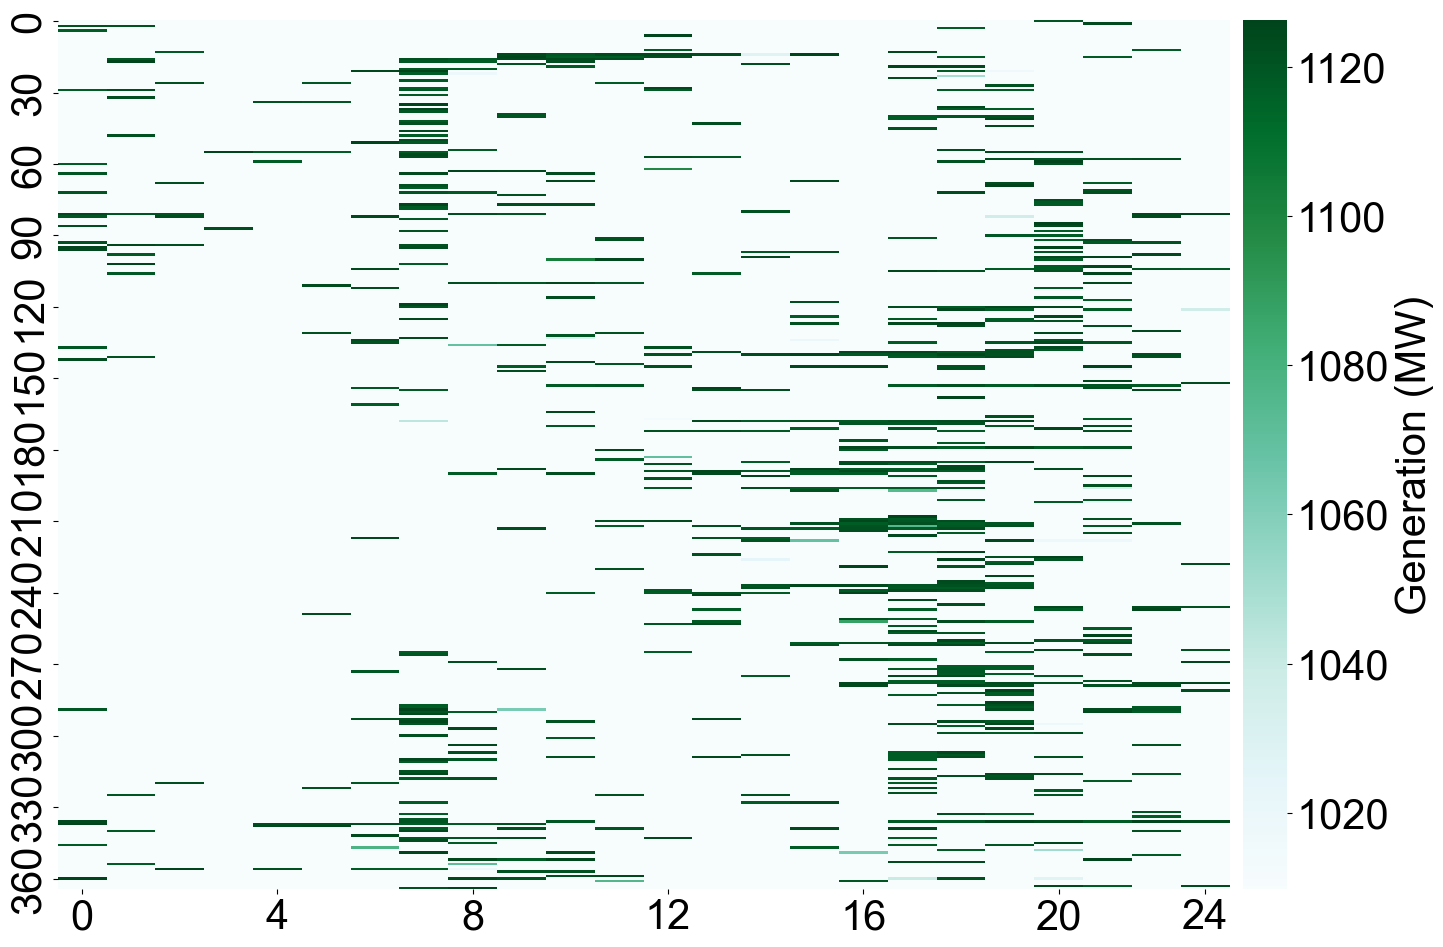

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_excel('plotting data.xlsx', sheet_name='Output')

# Extract pIES_MW column (assuming it contains 8760 hourly values)
power_data = df['pIES_MW'].values

# Reshape the data into a 365x24 matrix (days x hours)
# Each row represents a day, each column represents an hour
heatmap_data = power_data.reshape(365, 24)

# Create the heatmap
plt.figure(figsize=(18, 11.29))

# Create heatmap using seaborn
ax = sns.heatmap(heatmap_data,
                 cmap='BuGn',  # Color map
                 cbar=True,       # Show color bar
                 xticklabels=6,   # Show every 6th hour label to avoid overlap
                 yticklabels=30,
                 cbar_kws={
                     'shrink': 1.0,
                     'pad': 0.01,
                     'label': 'Generation (MW)'
                 }
                 )

# Set custom x-axis labels (every 4 hours, including 24:00)
x_ticks = list(range(0, 24, 4)) + [23]  # Add 23 to represent 24:00
x_labels = [f'{i}' for i in range(0, 24, 4)] + ['24']
ax.set_xticks([x + 0.5 for x in x_ticks])
ax.set_xticklabels(x_labels)

# Set custom y-axis labels (months)
month_centers = [(month_starts[i] + month_starts[i+1]) // 2 for i in range(len(month_starts)-1)]
month_centers.append((334 + 365) // 2)  
ax.set_yticks([y + 0.5 for y in month_centers])
ax.set_yticklabels(month_labels)

# Invert y-axis to make it increase from bottom to top
ax.invert_yaxis()

# Set axis labels
plt.xlabel('Hour of Day')
plt.ylabel('Day of Year')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
# plt.show()

# Optional: Save the plot
plt.savefig('../output/figs/power_generation_heatmap.pdf', bbox_inches='tight')

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

full_color_list = [
    "#6699CD", "#FFD37F", "#FF7F7F", "#6699CD", "#B9B9B9",
    "#CC3300", "#D8A46A", "#663300", "#E86718", "#FFC431", "#A46A4D",
    "#3677CE", "#A8D56D", "#224686", "#29BD9A", "#63C0EF",
    "#036868", "#9B77CB", "#86DED4", "#723193",
    "#5B6EC1", "#62AE9E", "#A6D1FD"
]

# Define colors for different energy types
thermal_color = "#FF7F7F"  # Red for thermal energy
electrical_color = "#BEE8FF"  # Blue for electrical energy
hydrogen_color = "#A8D56D"  # Green for hydrogen

# ------------------------------------------------------------
# 1. Read the data and calculate total flows
# ------------------------------------------------------------
FILE_NAME   = "plotting data.xlsx"
SHEET_NAME  = "Sankey"

df = pd.read_excel(FILE_NAME, sheet_name=SHEET_NAME)

# If the sheet contains multiple rows (e.g. several scenarios or
# time periods) we aggregate by summing; for a single row this
# simply returns that row's values.
totals = df.sum(numeric_only=True)

R2T = totals["R2T"]         # Reactor → Turbine
R2E = totals["R2E"]         # Reactor → Electrolyzer
T2B = totals["T2B"]         # Turbine → BOP
T2E = totals["T2E"]         # Turbine → Electrolyzer
S2G_energy    = totals["energy"]     # Turbine → Grid (energy)
S2G_ancillary = totals["ancillary"]  # Turbine → Grid (ancillary)
E2H = totals["E2H"]         # Electrolyzer → Hydrogen

# ------------------------------------------------------------
# 2. Define Sankey nodes and links
# ------------------------------------------------------------
nodes = [
    "Reactor",          # 0
    "Turbine",          # 1
    "Electrolyzer",     # 2
    "BOP",              # 3
    "Grid-Energy",      # 4
    "Grid-Ancillary",   # 5
    "Hydrogen"          # 6
]

# Reorder sources, targets, values, and colors to draw inflows to Electrolyzer last (on top)
sources = [
    0,  # Reactor → Turbine
    1,  # Turbine → BOP
    1,  # Turbine → Grid-Energy
    1,  # Turbine → Grid-Ancillary
    2,  # Electrolyzer → Hydrogen
    0,  # Reactor → Electrolyzer (inflow to E, draw last)
    1   # Turbine → Electrolyzer (inflow to E, draw last)
]

targets = [
    1,  # Turbine
    3,  # BOP
    4,  # Grid-Energy
    5,  # Grid-Ancillary
    6,  # Hydrogen
    2,  # Electrolyzer
    2   # Electrolyzer
]

values = [
    R2T,
    T2B,
    S2G_energy,
    S2G_ancillary,
    E2H,
    R2E,
    T2E
]

# Assign colors to links based on energy type (in new order)
link_colors = [
    thermal_color,     # R2T: thermal
    electrical_color,  # T2B: electrical
    electrical_color,  # S2G_energy: electrical
    electrical_color,  # S2G_ancillary: electrical
    hydrogen_color,    # E2H: hydrogen
    thermal_color,     # R2E: thermal
    electrical_color   # T2E: electrical
]

# Define link borders: white border only for inflows to Electrolyzer
link_line_colors = ['rgba(0,0,0,0)'] * len(sources)  # Transparent for most
link_line_widths = [0] * len(sources)  # No border for most
# Last two are inflows to E
link_line_colors[-2] = 'white'
link_line_widths[-2] = 2
link_line_colors[-1] = 'white'
link_line_widths[-1] = 2

# ------------------------------------------------------------
# 3. Create labels for the links with values
# ------------------------------------------------------------
def format_value(val):
    """Format value for display with thousands separator - adjust decimal places as needed"""
    if val >= 1000:
        return f"{val:,.0f}"
    elif val >= 100:
        return f"{val:,.1f}"
    else:
        return f"{val:,.2f}"

# Create labels for each link showing the flow value (in new order)
link_labels = [format_value(val) for val in values]

# ------------------------------------------------------------
# 4. Build the Sankey diagram with annotations
# ------------------------------------------------------------
# Select colors for nodes from the full_color_list (first 7 for the 7 nodes)
node_colors = full_color_list[:len(nodes)]

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        label=nodes,
        color=node_colors,  # Assign custom colors to nodes
        pad=15,
        thickness=15,   # Node thickness in pixels
        line=dict(width=0.5, color="gray")
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors,  # Assign colors to links
        line=dict(
            color=link_line_colors,
            width=link_line_widths
        ),
        # Add custom hover text with flow descriptions
        hovertemplate='%{source.label} → %{target.label}<br>Flow: %{value}<extra></extra>'
    )
)])

# ------------------------------------------------------------
# 5. Add text annotations for flow values
# ------------------------------------------------------------
# Updated positions
annotation_positions = [
    # R2T: Reactor → Turbine
    {'x': 0.1, 'y': 0.75, 'text': f'{format_value(R2T)}', 'description': 'Reactor → Turbine'},
    # T2B: Turbine → BOP
    {'x': 0.70, 'y': 0.0, 'text': f'{format_value(T2B)}', 'description': 'Turbine → BOP'},
    # S2G_energy: Turbine → Grid-Energy
    {'x': 0.85, 'y': 0.90, 'text': f'{format_value(S2G_energy)}', 'description': 'Turbine → Grid-Energy'},
    # S2G_ancillary: Turbine → Grid-Ancillary
    {'x': 0.84, 'y': 0.12, 'text': f'{format_value(S2G_ancillary)}', 'description': 'Turbine → Grid-Ancillary'},
    # E2H: Electrolyzer → Hydrogen
    {'x': 0.95, 'y': 0.20, 'text': f'{format_value(E2H)}', 'description': 'Electrolyzer → Hydrogen'},
    # R2E: Reactor → Electrolyzer  
    {'x': 0.05, 'y': 0.20, 'text': f'{format_value(R2E)}', 'description': 'Reactor → Electrolyzer'},
    # T2E: Turbine → Electrolyzer
    {'x': 0.53, 'y': 0.30, 'text': f'{format_value(T2E)}', 'description': 'Turbine → Electrolyzer'}
]

# Add annotations to the figure
annotations = []
for pos in annotation_positions:
    if pos['description'] in ['Reactor → Turbine','Electrolyzer → Hydrogen', 'Reactor → Electrolyzer', 'Turbine → Electrolyzer']:
        annotation_text = f"{pos['description']}<br>{pos['text']} MW<sub>th</sub>"
    else:
        annotation_text = f"{pos['description']}: {pos['text']} MW<sub>th</sub>"
    annotations.append(
        dict(
            x=pos['x'],
            y=pos['y'],
            text=annotation_text,
            showarrow=False,
            font=dict(size=14, color='black', family='Arial'),
            # bgcolor='rgba(255,255,255,0.8)',
            # bordercolor='gray',
            # borderwidth=1,
            # borderpad=2,
            xref='paper',
            yref='paper'
        )
    )

# ------------------------------------------------------------
# 6. Set the figure size and add annotations
# ------------------------------------------------------------
cm_to_px = lambda cm: cm / 2.54 * 96
fig.update_layout(
    width=int(cm_to_px(18)),
    height=int(cm_to_px(11.28)),
    margin=dict(l=10, r=10, t=10, b=10),  # Tight margins, no title
    annotations=annotations,
    font=dict(family='Arial', size=16),
    # Optional: Add a subtle background
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# ------------------------------------------------------------
# 7. Alternative: Add a summary table annotation
# ------------------------------------------------------------
# Create a summary table showing all flows
summary_text = f"""
<b>Energy Flow Summary:</b><br>
Reactor → Turbine: {format_value(R2T)}<br>
Reactor → Electrolyzer: {format_value(R2E)}<br>
Turbine → BOP: {format_value(T2B)}<br>
Turbine → Electrolyzer: {format_value(T2E)}<br>
Turbine → Grid (Energy): {format_value(S2G_energy)}<br>
Turbine → Grid (Ancillary): {format_value(S2G_ancillary)}<br>
Electrolyzer → Hydrogen: {format_value(E2H)}
"""

# Add summary table (uncomment if you want this instead of individual annotations)
# fig.add_annotation(
#     x=0.02,
#     y=0.98,
#     text=summary_text,
#     showarrow=False,
#     font=dict(size=9, color='black'),
    # bgcolor='rgba(240,240,240,0.9)',
#     bordercolor='gray',
#     borderwidth=1,
#     borderpad=5,
#     xref='paper',
#     yref='paper',
#     align='left',
#     valign='top'
# )

# ------------------------------------------------------------
# 8. Show or export the figure
# ------------------------------------------------------------
fig.show()                       # Opens an interactive window
# fig.write_html("sankey_annotated.html")  # Uncomment to save as HTML
fig.write_image("../output/figs/sankey_diagram.pdf")
# ------------------------------------------------------------
# 9. Optional: Print flow summary to console
# ------------------------------------------------------------
print("Energy Flow Summary:")
print(f"Reactor → Turbine: {format_value(R2T)}")
print(f"Reactor → Electrolyzer: {format_value(R2E)}")
print(f"Turbine → BOP: {format_value(T2B)}")
print(f"Turbine → Electrolyzer: {format_value(T2E)}")
print(f"Turbine → Grid (Energy): {format_value(S2G_energy)}")
print(f"Turbine → Grid (Ancillary): {format_value(S2G_ancillary)}")
print(f"Electrolyzer → Hydrogen: {format_value(E2H)}")
print(f"Total reactor output: {format_value(R2T + R2E)}")
print(f"Total turbine output: {format_value(T2B + T2E + S2G_energy + S2G_ancillary)}")

Energy Flow Summary:
Reactor → Turbine: 31,611,659
Reactor → Electrolyzer: 318,541
Turbine → BOP: 59,243
Turbine → Electrolyzer: 4,999,881
Turbine → Grid (Energy): 26,235,570
Turbine → Grid (Ancillary): 316,964
Electrolyzer → Hydrogen: 5,318,422
Total reactor output: 31,930,200
Total turbine output: 31,611,658


/tmp/ipykernel_3136190/579589376.py:243: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




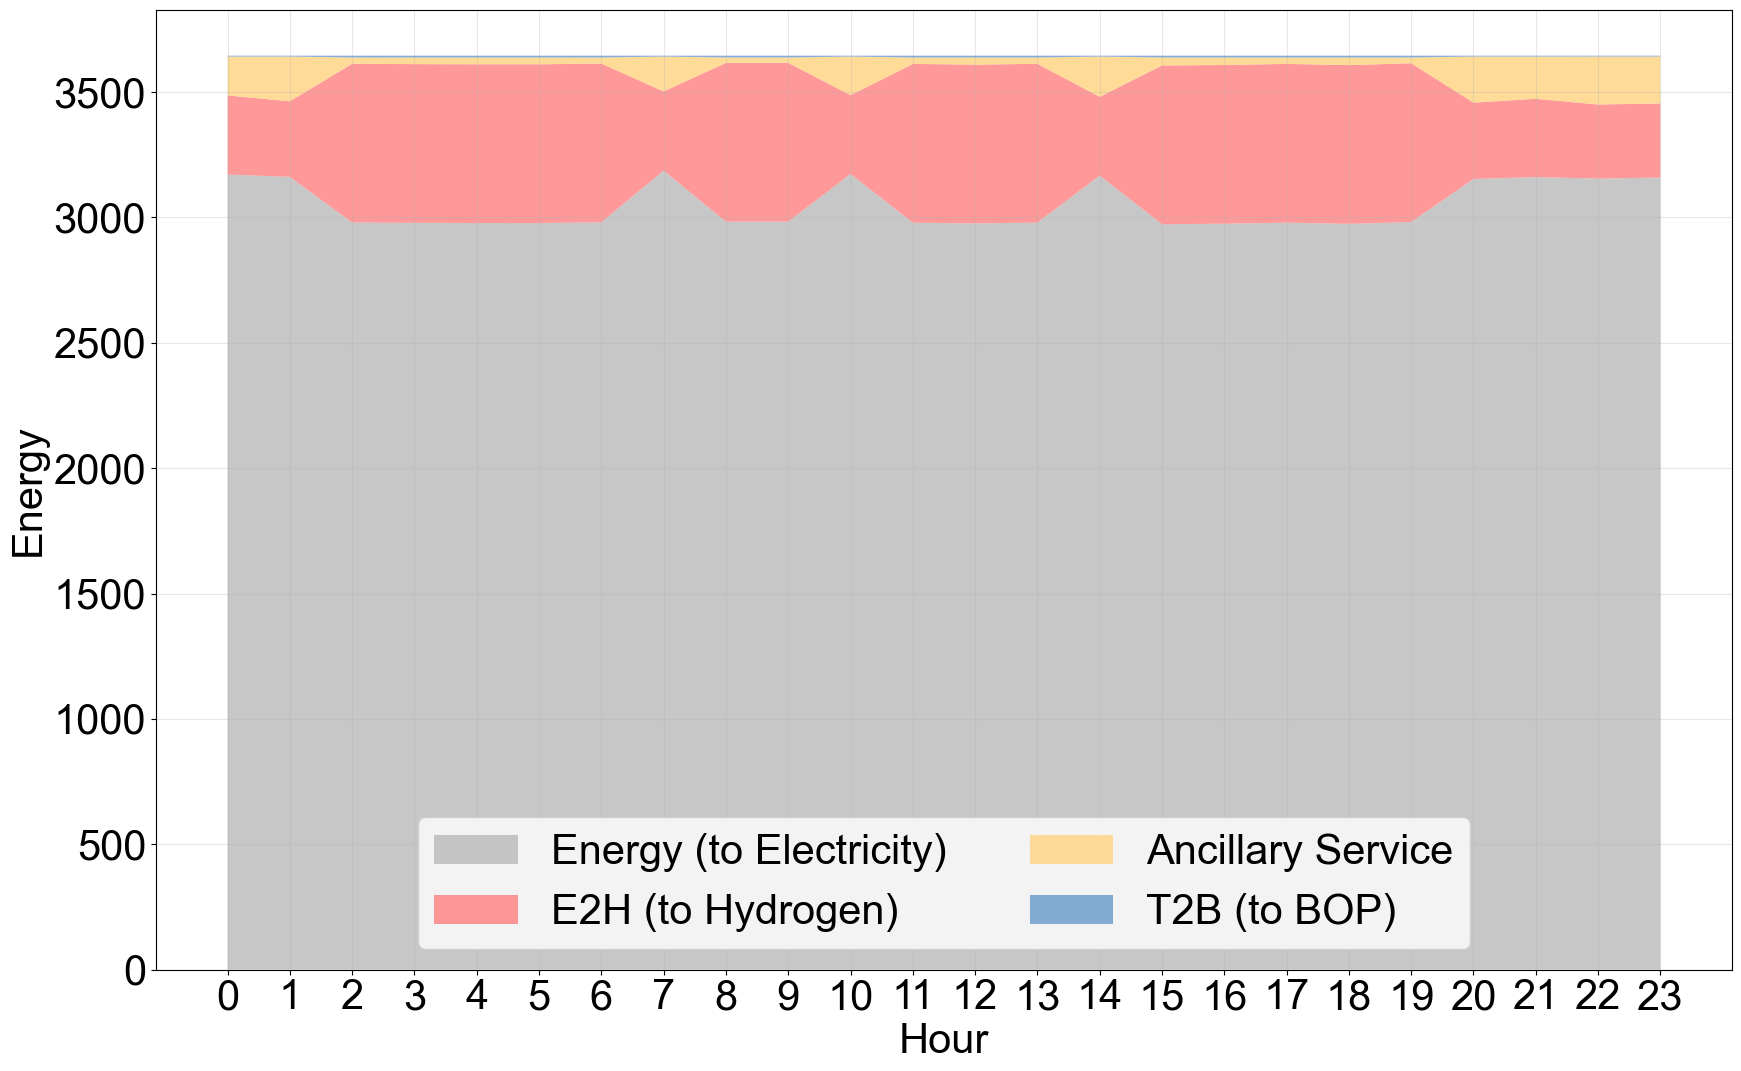

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file and load the Dispatch sheet
df = pd.read_excel('plotting data.xlsx', sheet_name='Dispatch')

# Extract the four energy columns
t2b_energy = df['T2B']
ancillary_energy = df['ancillary']
e2h_energy = df['E2H']
electricity_energy = df['energy']

# Create hour labels for x-axis (0-23 hours)
hours = np.arange(24)

# Set up the figure with specified size
plt.figure(figsize=(18, 11.29))

# Define color list
full_color_list = [
    "#6699CD", "#FFD37F", "#FF7F7F", "#6699CD", "#B9B9B9",
    "#CC3300", "#D8A46A", "#663300", "#E86718", "#FFC431", "#A46A4D",
    "#3677CE", "#A8D56D", "#224686", "#29BD9A", "#63C0EF",
    "#036868", "#9B77CB", "#86DED4", "#723193",
    "#5B6EC1", "#62AE9E", "#A6D1FD"
]

# Select colors for the four energy types (from top to bottom: T2B, ancillary, E2H, energy)
colors = [full_color_list[0], full_color_list[1], full_color_list[2], full_color_list[4]]

# Create stacked area plot with specified colors and order (T2B at top, energy at bottom)
plt.stackplot(hours, electricity_energy, e2h_energy, ancillary_energy, t2b_energy,
              labels=['Energy (to Electricity)', 'E2H (to Hydrogen)', 'Ancillary Service', 'T2B (to BOP)'],
              colors=[colors[3], colors[2], colors[1], colors[0]],
              alpha=0.8)

# Customize the plot
plt.xlabel('Hour')
plt.ylabel('Energy')
plt.legend(loc='lower center', ncol=2)
plt.grid(True, alpha=0.3)

# Set x-axis ticks to show all 24 hours
plt.xticks(hours)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

Summary Statistics:
----------------------------------------------------------------------
PJM: Generation 9,519,361 MW, Services 692,588 MW (7.3%)
ERCOT: Generation 9,889,361 MW, Services 746,011 MW (7.5%)
MISO: Generation 9,090,236 MW, Services 472,982 MW (5.2%)
SPP: Generation 8,447,312 MW, Services 469,283 MW (5.6%)
CAISO: Generation 7,505,584 MW, Services 428,071 MW (5.7%)
NYISO: Generation 8,705,539 MW, Services 737,717 MW (8.5%)
ISONE: Generation 8,834,548 MW, Services 237,259 MW (2.7%)

Total ISOs analyzed: 7
Overall average generation: 8,855,991 MW
Overall average services: 540,559 MW
Overall average percentage: 6.1%


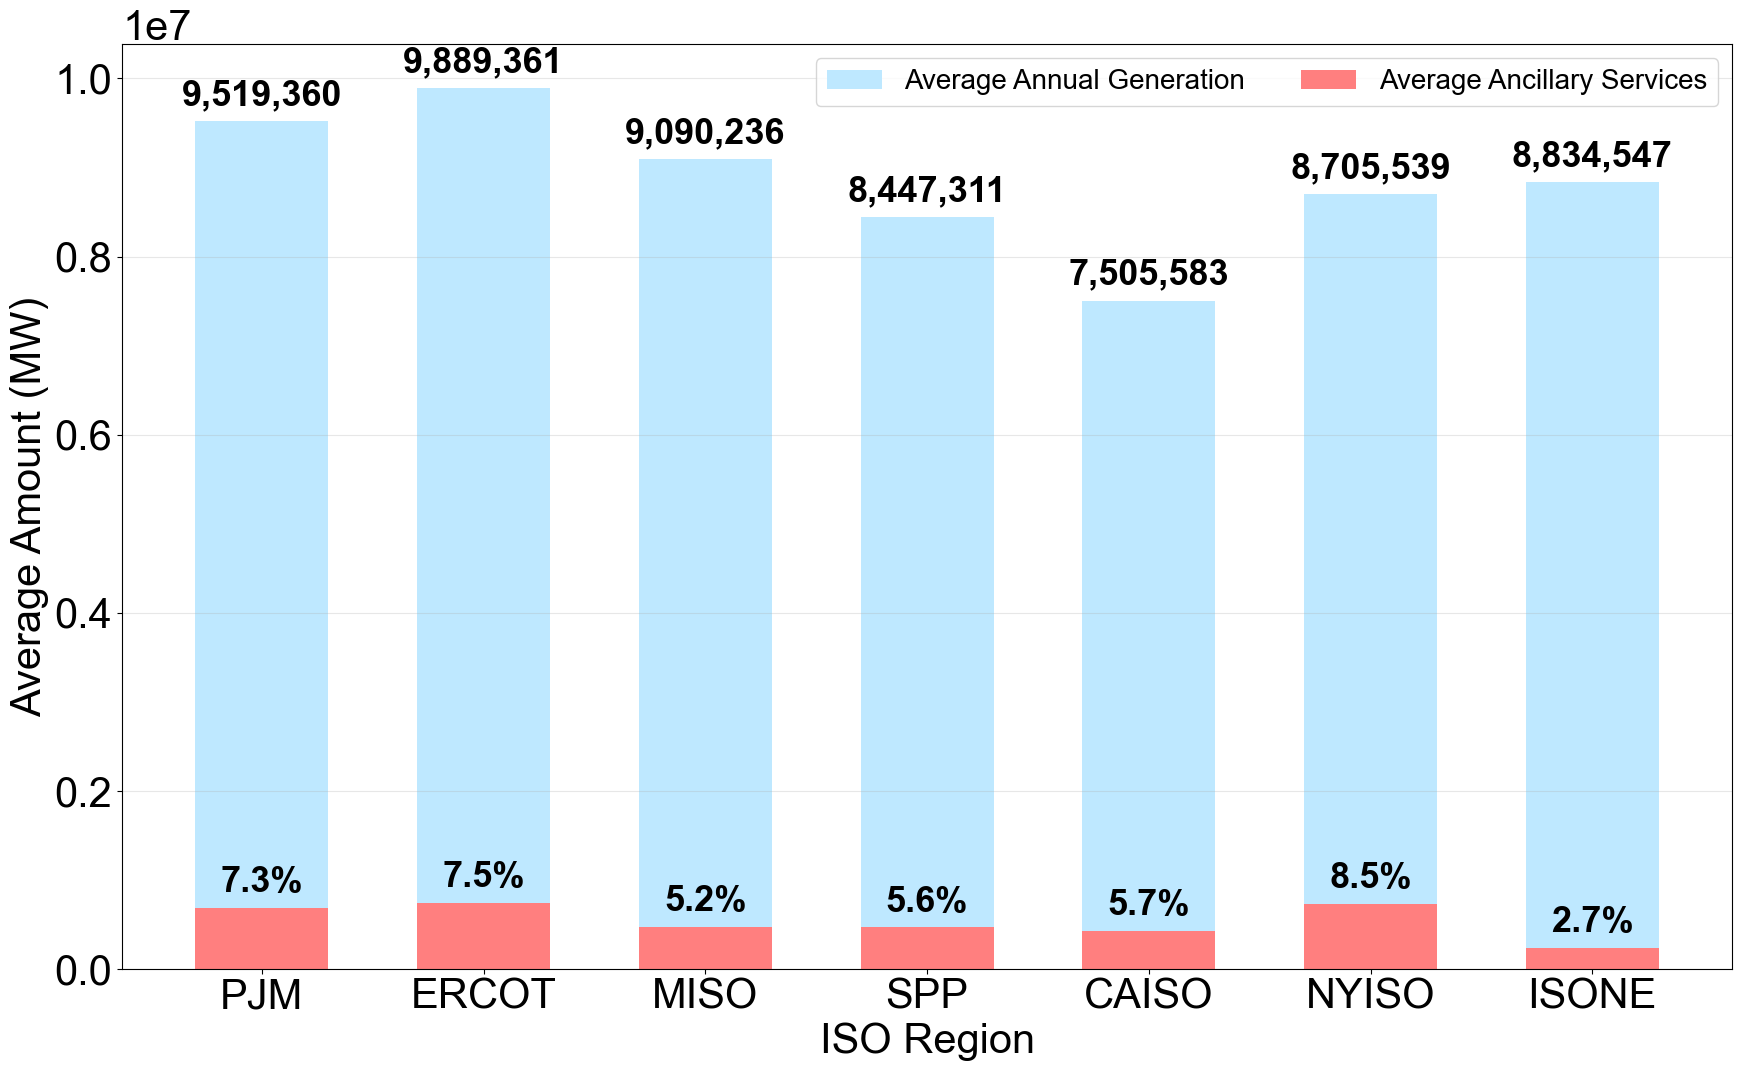

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file and load the Bid sheet
df = pd.read_excel('plotting data.xlsx', sheet_name='Bid')

# Get the ISO names from the first column
iso_names = df['iso_region'].unique()

# Define service columns (excluding iso_region, nuclear_capacity_mw, and case1_nameplate_power_factor)
service_columns = [col for col in df.columns if col not in ['iso_region', 'nuclear_capacity_mw', 'case1_nameplate_power_factor']]

# Calculate average bid amount and average theoretical generation for each ISO
iso_avg_bids = []
iso_avg_generation = []
iso_labels = []

for iso in iso_names:
    # Filter data for current ISO
    iso_data = df[df['iso_region'] == iso]
    
    # Calculate average bid and average generation for each plant/row in this ISO
    plant_averages = []
    plant_generations = []
    
    for idx, row in iso_data.iterrows():
        # Calculate theoretical annual generation for this plant
        nuclear_capacity = row['nuclear_capacity_mw']
        capacity_factor = row['case1_nameplate_power_factor']
        
        if pd.notna(nuclear_capacity) and pd.notna(capacity_factor):
            annual_generation = nuclear_capacity * capacity_factor * 8760
            plant_generations.append(annual_generation)
        
        # Count non-empty services for this plant and calculate total bid
        plant_total_bid = 0
        plant_service_count = 0
        
        for service in service_columns:
            service_value = row[service]
            # Check if this service has a non-empty value
            if pd.notna(service_value) and service_value != '':
                plant_service_count += 1
                plant_total_bid += service_value
        
        # Calculate average bid for this plant if it provides at least one service
        if plant_service_count > 0:
            plant_avg = plant_total_bid / plant_service_count
            plant_averages.append(plant_avg)
    
    # Calculate ISO averages: average of all plants in this ISO
    if len(plant_averages) > 0 and len(plant_generations) > 0:
        iso_avg_bid = np.mean(plant_averages)
        iso_avg_gen = np.mean(plant_generations)  # Average generation of all plants
        iso_avg_bids.append(iso_avg_bid)
        iso_avg_generation.append(iso_avg_gen)
        iso_labels.append(iso)

# Convert to numpy arrays for easier manipulation
iso_avg_bids = np.array(iso_avg_bids)
iso_avg_generation = np.array(iso_avg_generation)
iso_labels = np.array(iso_labels)

# Create the overlapping bar chart
# Figure size in inches
fig_width = 18  # 18 inches
fig_height = 11.29  # 11.29 inches

plt.figure(figsize=(fig_width, fig_height))

# Create bar chart with overlapping bars
x_pos = np.arange(len(iso_labels))
width = 0.6

# Plot theoretical generation bars (background)
bars_generation = plt.bar(x_pos, iso_avg_generation, width=width, color='#BEE8FF', label='Average Annual Generation')

# Plot ancillary services bars (foreground, overlapping)
bars_services = plt.bar(x_pos, iso_avg_bids, width=width, color='#FF7F7F', label='Average Ancillary Services')

# Add data labels
for i, (gen_bar, service_bar, gen_value, service_value) in enumerate(zip(bars_generation, bars_services, iso_avg_generation, iso_avg_bids)):
    # Label for generation (on generation bar)
    plt.text(gen_bar.get_x() + gen_bar.get_width()/2, gen_bar.get_height() + max(iso_avg_generation)*0.01,
             f'{int(gen_value):,}', ha='center', va='bottom', fontweight='bold')
    
    # Label for services (percentage of generation)
    percentage = (service_value / gen_value) * 100
    plt.text(service_bar.get_x() + service_bar.get_width()/2, service_bar.get_height() + max(iso_avg_generation)*0.01,
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.xlabel('ISO Region')
plt.ylabel('Average Amount (MW)')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))  # Use scientific notation for y-axis
plt.xticks(x_pos, iso_labels)
plt.grid(axis='y', alpha=0.3)  # Add horizontal grid lines
plt.legend(fontsize=20, ncol=2)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
# plt.show()
plt.savefig('../output/figs/ancillary_services.pdf', bbox_inches='tight')

# Optional: Print summary statistics
print("Summary Statistics:")
print("-" * 70)
for i, iso in enumerate(iso_labels):
    percentage = (iso_avg_bids[i] / iso_avg_generation[i]) * 100
    print(f"{iso}: Generation {iso_avg_generation[i]:,.0f} MW, Services {iso_avg_bids[i]:,.0f} MW ({percentage:.1f}%)")
print(f"\nTotal ISOs analyzed: {len(iso_labels)}")
print(f"Overall average generation: {np.mean(iso_avg_generation):,.0f} MW")
print(f"Overall average services: {np.mean(iso_avg_bids):,.0f} MW")
print(f"Overall average percentage: {(np.mean(iso_avg_bids) / np.mean(iso_avg_generation)) * 100:.1f}%")

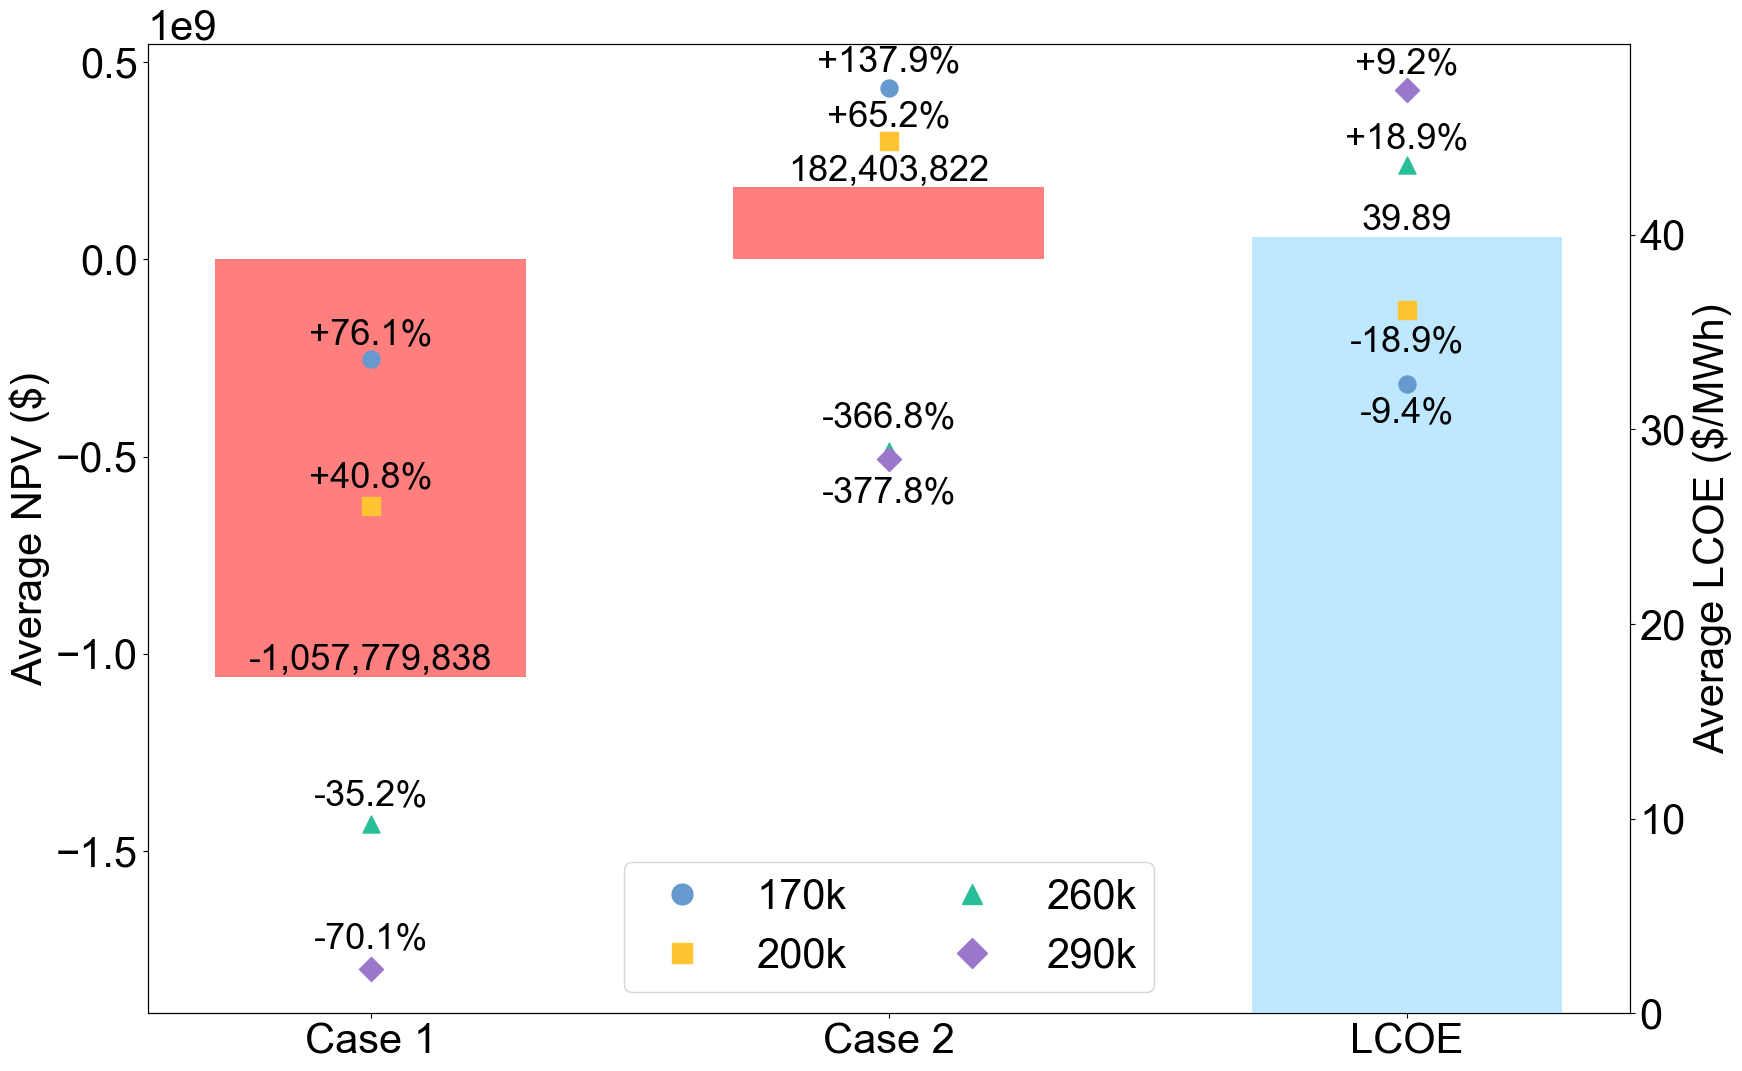

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ────────────────────────── Configuration ──────────────────────────
file_path   = "sa.xlsx"
npv_sheets  = ["Case 1 NPV", "Case 2 NPV"]
lcoe_sheet  = "LCOE"
cols        = ["170k", "200k", "230k", "260k", "290k"]

bar_colors  = {"NPV": "#FF7F7F", "LCOE": "#BEE8FF"}

# choose four distinct hues for the markers
full_color_list = [
    "#6699CD", "#FFD37F", "#FF7F7F", "#6699CD", "#B9B9B9",
    "#CC3300", "#D8A46A", "#663300", "#E86718", "#FFC431", "#A46A4D",
    "#3677CE", "#A8D56D", "#224686", "#29BD9A", "#63C0EF",
    "#036868", "#9B77CB", "#86DED4", "#723193",
    "#5B6EC1", "#62AE9E", "#A6D1FD"
]
marker_colors = [full_color_list[i] for i in (0, 9, 14, 17)]

# explicit marker specifications
marker_specs = [
    # Case 1 NPV (x = 0)
    dict(case="Case 1 NPV", col="170k", x=0, marker="o", color=marker_colors[0], offset=+0.08),
    dict(case="Case 1 NPV", col="200k", x=0, marker="s", color=marker_colors[1], offset= 0.05),
    dict(case="Case 1 NPV", col="260k", x=0, marker="^", color=marker_colors[2], offset=+0.02),
    dict(case="Case 1 NPV", col="290k", x=0, marker="D", color=marker_colors[3], offset=0.02),

    # Case 2 NPV (x = 1)
    dict(case="Case 2 NPV", col="170k", x=1, marker="o", color=marker_colors[0], offset=+0.06),
    dict(case="Case 2 NPV", col="200k", x=1, marker="s", color=marker_colors[1], offset=0.06),
    dict(case="Case 2 NPV", col="260k", x=1, marker="^", color=marker_colors[2], offset=+0.09),
    dict(case="Case 2 NPV", col="290k", x=1, marker="D", color=marker_colors[3], offset=-0.25),

    # LCOE (x = 2) → right axis
    dict(case="LCOE", col="170k", x=2, marker="o", color=marker_colors[0], offset=+0.04, axis="lcoe"),
    dict(case="LCOE", col="200k", x=2, marker="s", color=marker_colors[1], offset=-0.17, axis="lcoe"),
    dict(case="LCOE", col="260k", x=2, marker="^", color=marker_colors[2], offset=+0.1, axis="lcoe"),
    dict(case="LCOE", col="290k", x=2, marker="D", color=marker_colors[3], offset=-0.07, axis="lcoe"),
]

# ──────────────────────── Data preparation ─────────────────────────
avg_npv_df = pd.DataFrame(
    {sh: pd.read_excel(file_path, sheet_name=sh)[cols].mean() for sh in npv_sheets}
).T
avg_lcoe_df = pd.read_excel(file_path, sheet_name=lcoe_sheet)[cols].mean().to_frame().T
avg_lcoe_df.index = ["LCOE"]

combined_df = pd.concat([avg_npv_df, avg_lcoe_df])

# ────────────────────────── Plot layout ────────────────────────────
fig, ax_npv = plt.subplots(figsize=(18, 11.29))
ax_lcoe = ax_npv.twinx()

x_pos = [0, 1, 2]  # Case 1, Case 2, LCOE

# baseline bars (230 k O&M)
bars_npv = ax_npv.bar(
    x_pos[:2],
    combined_df.loc[npv_sheets, "230k"],
    color=bar_colors["NPV"],
    width=0.6,
    label="NPV 230k"
)
bars_lcoe = ax_lcoe.bar(
    [x_pos[2]],
    combined_df.loc["LCOE", "230k"],
    color=bar_colors["LCOE"],
    width=0.6,
    label="LCOE 230k"
)

# numerical labels on the bars
for bar in bars_npv:
    y = bar.get_height()
    ax_npv.text(bar.get_x() + bar.get_width() / 2, y, f"{y:,.0f}", ha="center", va="bottom")
y_lcoe = bars_lcoe[0].get_height()
ax_lcoe.text(bars_lcoe[0].get_x() + bars_lcoe[0].get_width() / 2, y_lcoe, f"{y_lcoe:,.2f}",
             ha="center", va="bottom")

# ───────────────────── Markers and percentages ─────────────────────
for spec in marker_specs:
    axis = ax_lcoe if spec.get("axis") == "lcoe" else ax_npv

    y_val = combined_df.loc[spec["case"], spec["col"]]
    base   = combined_df.loc[spec["case"], "230k"]

    # special rule for Case 1 NPV: base is negative, so the sign logic is flipped
    if spec["case"] == "Case 1 NPV":
        pct = (y_val - base) / abs(base) * 100
    else:
        pct = (y_val - base) / base * 100

    axis.scatter(spec["x"], y_val, marker=spec["marker"], color=spec["color"], s=150, zorder=5)
    axis.text(spec["x"], y_val + spec["offset"] * abs(y_val), f"{pct:+.1f}%",
              ha="center", va="bottom")

# ──────────────────────── Axis settings ────────────────────────────
ax_npv.set_ylabel("Average NPV ($)")
ax_lcoe.set_ylabel("Average LCOE ($/MWh)")
ax_npv.set_xticks(x_pos)
ax_npv.set_xticklabels(["Case 1", "Case 2", "LCOE"])

# custom legend: bars plus marker proxies
legend_handles = [
    Line2D([0], [0], marker="o", color=marker_colors[0], linestyle="None", label="170k", markersize=15),
    Line2D([0], [0], marker="s", color=marker_colors[1], linestyle="None", label="200k", markersize=15),
    Line2D([0], [0], marker="^", color=marker_colors[2], linestyle="None", label="260k", markersize=15),
    Line2D([0], [0], marker="D", color=marker_colors[3], linestyle="None", label="290k", markersize=15)
]
ax_npv.legend(handles=legend_handles, loc="lower center", ncol=2, frameon=True)

plt.tight_layout()
# plt.show()
plt.savefig('output/figs/npv_lcoe.pdf', bbox_inches='tight')


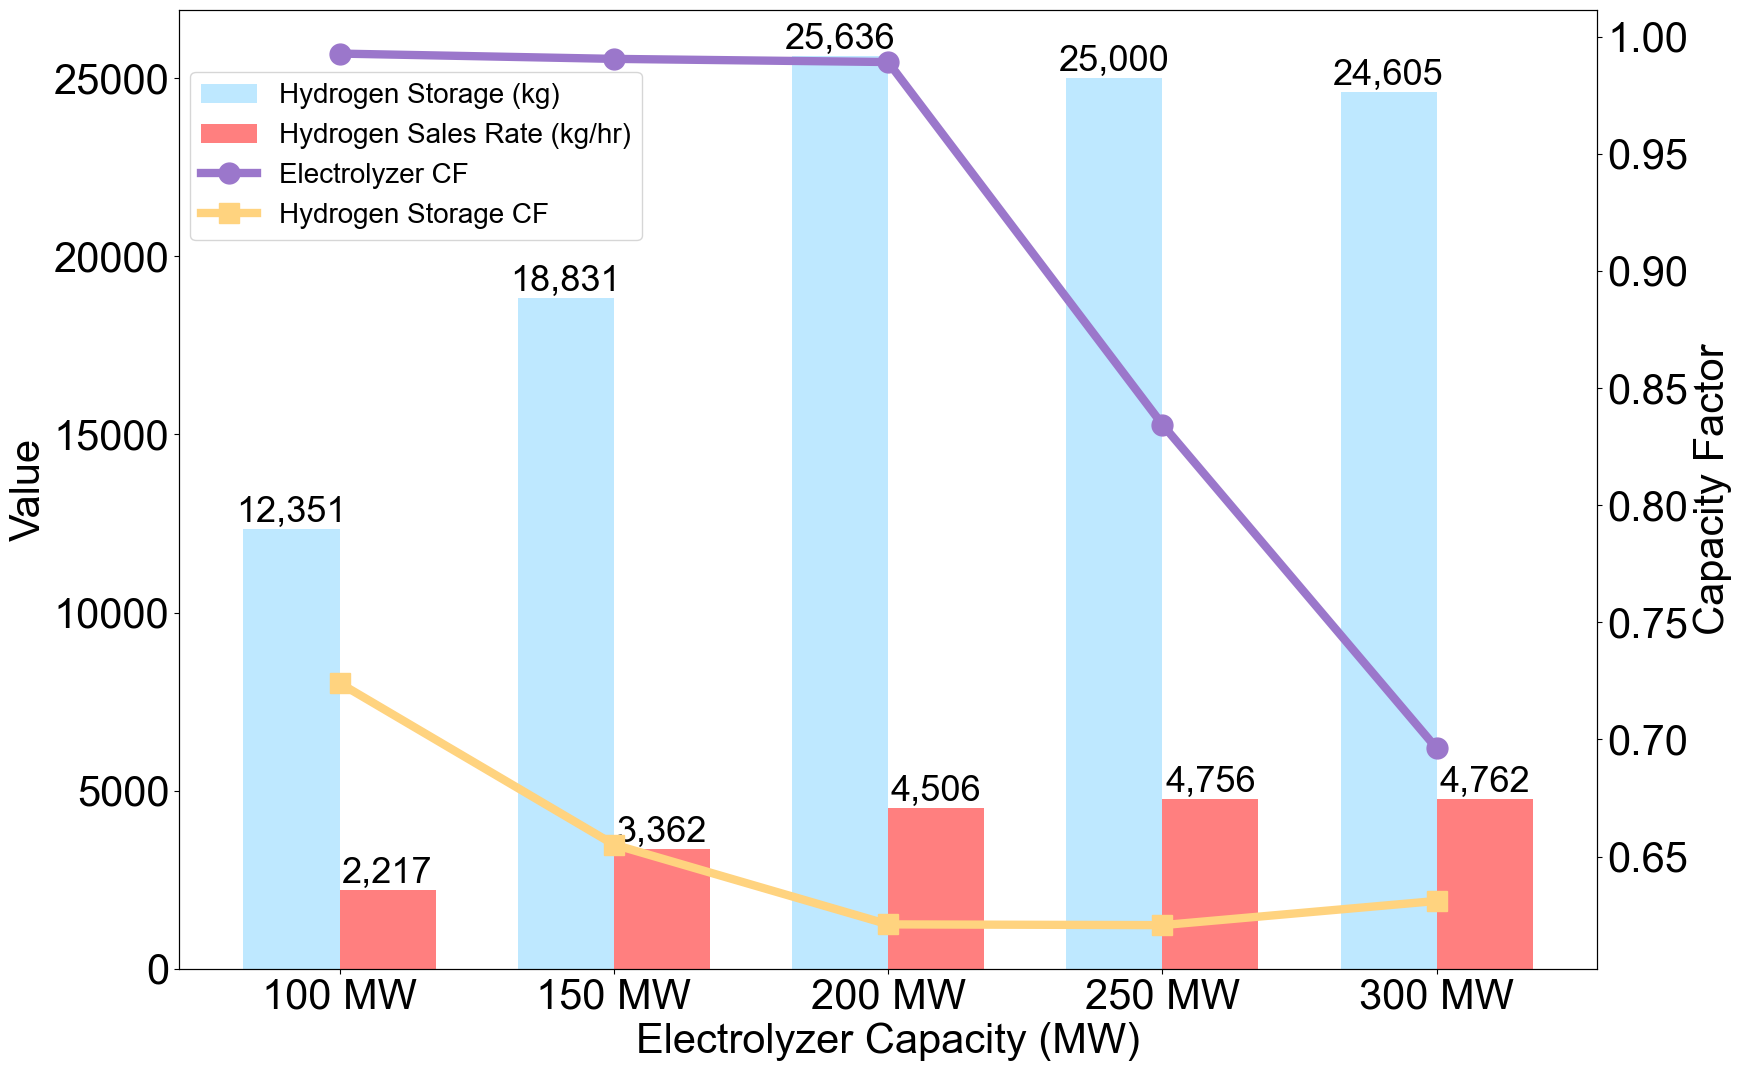

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define color list for line plots
full_color_list = [
    "#6699CD", "#FFD37F", "#FF7F7F", "#6699CD", "#B9B9B9",
    "#CC3300", "#D8A46A", "#663300", "#E86718", "#FFC431", "#A46A4D",
    "#3677CE", "#A8D56D", "#224686", "#29BD9A", "#63C0EF",
    "#036868", "#9B77CB", "#86DED4", "#723193",
    "#5B6EC1", "#62AE9E", "#A6D1FD"
]

# Load data from sa.xlsx
df = pd.read_excel('sa.xlsx', sheet_name='Capacity')

# Extract case names (100 MW, 150 MW, etc.)
cases = df.columns[1:].tolist()

# Extract the four data series by ITEM
storage = df.loc[df['ITEMS'] == 'Optimal_H2_Storage_Capacity_kg', cases].values.flatten()
sales_rate = df.loc[df['ITEMS'] == 'Optimal_H2_Constant_Sales_Rate_kg_hr', cases].values.flatten()
elec_cf = df.loc[df['ITEMS'] == 'Electrolyzer_Capacity_Factor_Actual', cases].values.flatten()
storage_cf = df.loc[df['ITEMS'] == 'H2_storage_capacity_factor', cases].values.flatten()

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(18, 11.29))
indices = np.arange(len(cases))
bar_width = 0.35

# Plot bar charts on primary y-axis
bars1 = ax1.bar(indices - bar_width/2, storage, bar_width,
                color='#BEE8FF', label='Hydrogen Storage (kg)')
bars2 = ax1.bar(indices + bar_width/2, sales_rate, bar_width,
                color='#FF7F7F', label='Hydrogen Sales Rate (kg/hr)')

ax1.set_xticks(indices)
ax1.set_xticklabels(cases)
ax1.set_ylabel('Value')
ax1.set_xlabel('Electrolyzer Capacity (MW)')

# Annotate bars: integer part with thousand separators
for bar in bars1:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, h,
             f"{h:,.0f}", ha='center', va='bottom')
for bar in bars2:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, h,
             f"{h:,.0f}", ha='center', va='bottom')

# Create secondary axis for line plots
ax2 = ax1.twinx()
line1, = ax2.plot(indices, elec_cf, marker='o',
                  label='Electrolyzer CF', color=full_color_list[17], linewidth=6, markersize=15)
line2, = ax2.plot(indices, storage_cf, marker='s',
                  label='Hydrogen Storage CF', color=full_color_list[1], linewidth=6, markersize=15)

ax2.set_ylabel('Capacity Factor')

# Annotate line points: two decimal places
# for x, y in zip(indices, elec_cf):
#     ax2.text(x, y, f"{y:.2f}", ha='center', va='bottom')
# for x, y in zip(indices, storage_cf):
#     ax2.text(x, y, f"{y:.2f}", ha='center', va='bottom')

# Combine and show legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', bbox_to_anchor=(-0.002, 0.95), ncol=1, frameon=True, fontsize=20)

plt.tight_layout()
# plt.show()
plt.savefig('../output/figs/sa_electrolyzer_capacity.pdf', bbox_inches='tight')


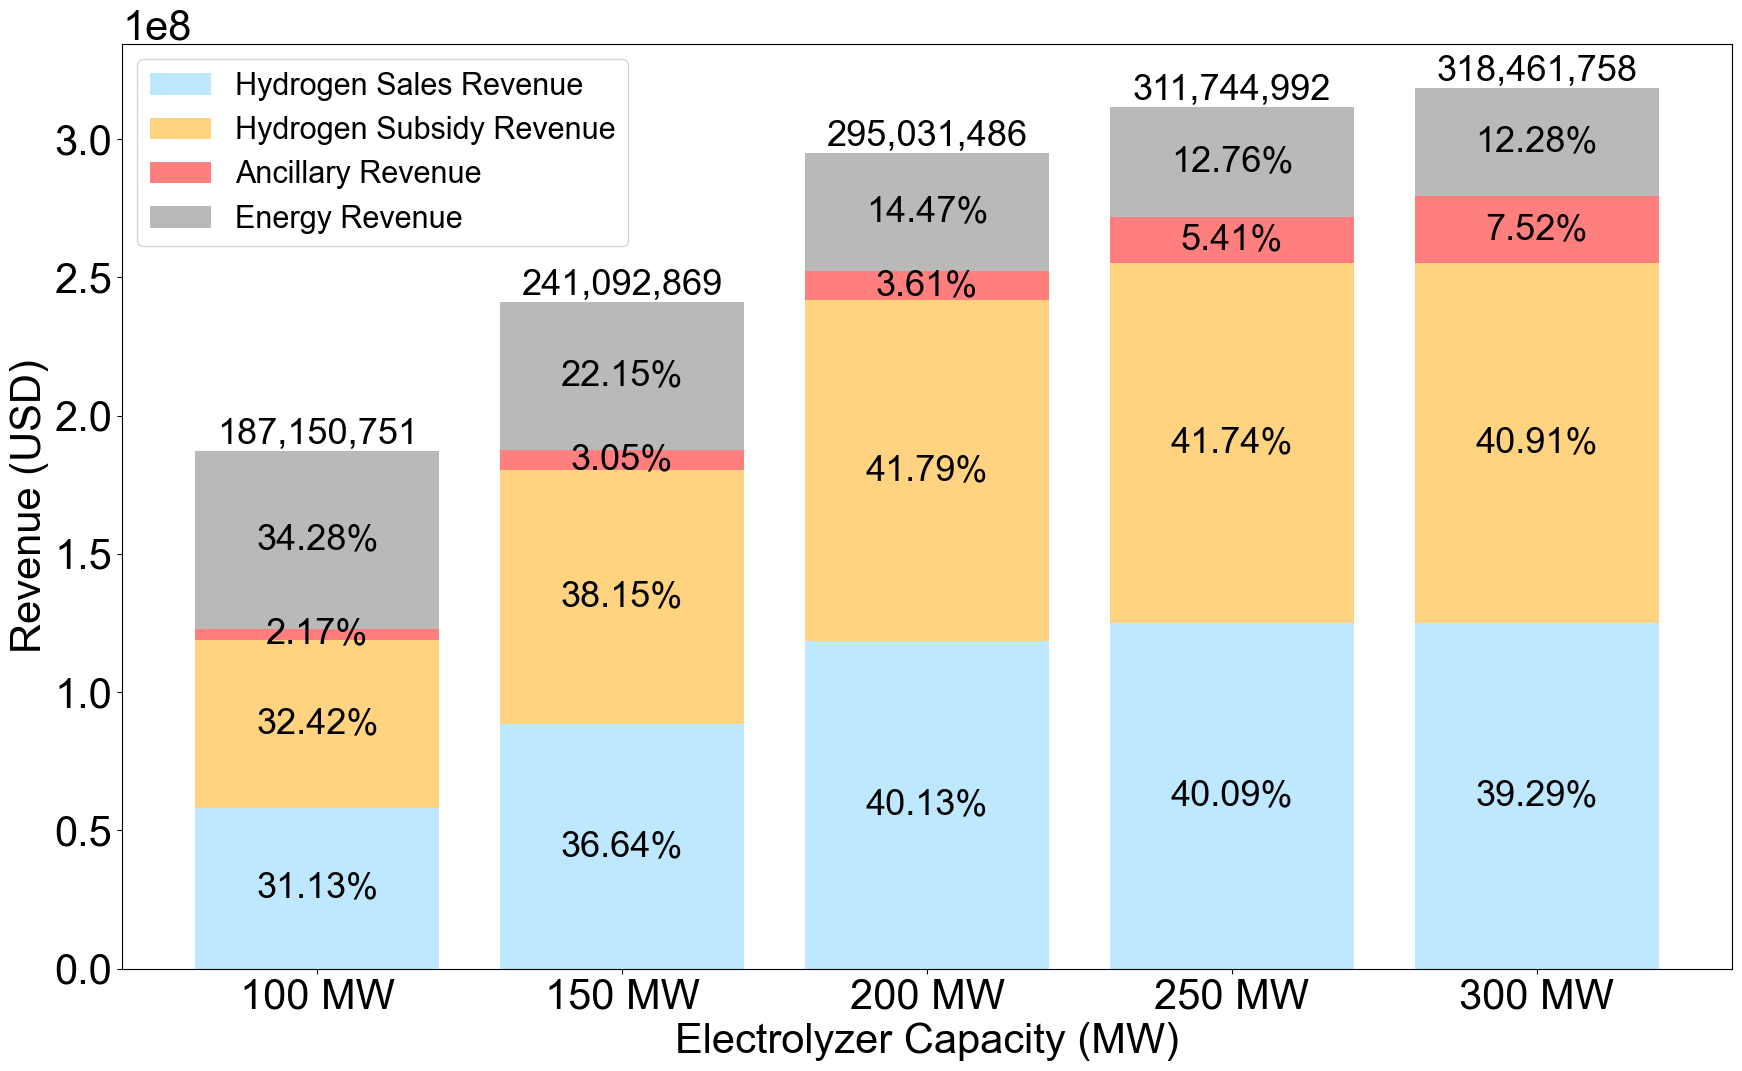

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define full color list for bars
full_color_list = [
    "#BEE8FF", "#FFD37F", "#FF7F7F", "#B9B9B9", "#B9B9B9",
    "#CC3300", "#D8A46A", "#663300", "#E86718", "#FFC431", "#A46A4D",
    "#3677CE", "#A8D56D", "#224686", "#29BD9A", "#63C0EF",
    "#036868", "#9B77CB", "#86DED4", "#723193",
    "#5B6EC1", "#62AE9E", "#A6D1FD"
]

# Load data from sa.xlsx
df = pd.read_excel('sa.xlsx', sheet_name='Capacity')

# Extract case names (100 MW, 150 MW, etc.)
cases = df.columns[1:].tolist()

# Extract revenue series by ITEM
sales_rev     = df.loc[df['ITEMS'] == 'Total_Hydrogen_Sales_Revenue_USD', cases].values.flatten()
subsidy_rev   = df.loc[df['ITEMS'] == 'Total_Hydrogen_Subsidy_Revenue_USD', cases].values.flatten()
ancillary_rev = df.loc[df['ITEMS'] == 'Total_Ancillary_Revenue_USD', cases].values.flatten()
energy_rev    = df.loc[df['ITEMS'] == 'Total_Energy_Revenue_USD', cases].values.flatten()

# Compute totals for each case
totals = sales_rev + subsidy_rev + ancillary_rev + energy_rev

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(18, 11.29))
indices = np.arange(len(cases))

# Plot each stack layer
bars1 = ax.bar(indices, sales_rev, color=full_color_list[0], label='Hydrogen Sales Revenue')
bars2 = ax.bar(indices, subsidy_rev, bottom=sales_rev, color=full_color_list[1], label='Hydrogen Subsidy Revenue')
bars3 = ax.bar(indices, ancillary_rev, bottom=sales_rev + subsidy_rev, color=full_color_list[2], label='Ancillary Revenue')
bars4 = ax.bar(indices, energy_rev, bottom=sales_rev + subsidy_rev + ancillary_rev, color=full_color_list[3], label='Energy Revenue')

# Annotate segment percentages
for i in range(len(cases)):
    # calculate cumulative bottoms
    bottoms = np.array([0, sales_rev[i], sales_rev[i] + subsidy_rev[i], sales_rev[i] + subsidy_rev[i] + ancillary_rev[i]])
    heights = np.array([sales_rev[i], subsidy_rev[i], ancillary_rev[i], energy_rev[i]])
    for j in range(4):
        pct = heights[j] / totals[i] * 100
        ax.text(indices[i], bottoms[j] + heights[j]/2,
                f"{pct:.2f}%", ha='center', va='center')

# Annotate total values on top
for i, total in enumerate(totals):
    ax.text(indices[i], total, f"{total:,.0f}", ha='center', va='bottom')

# Configure axes
ax.set_xticks(indices)
ax.set_xticklabels(cases)
ax.set_ylabel('Revenue (USD)')
ax.set_xlabel('Electrolyzer Capacity (MW)')
ax.legend(loc='upper left',  ncol=1, frameon=True, fontsize=22)

plt.tight_layout()
# plt.show()
plt.savefig('output/figs/sa_revenue.pdf', bbox_inches='tight')


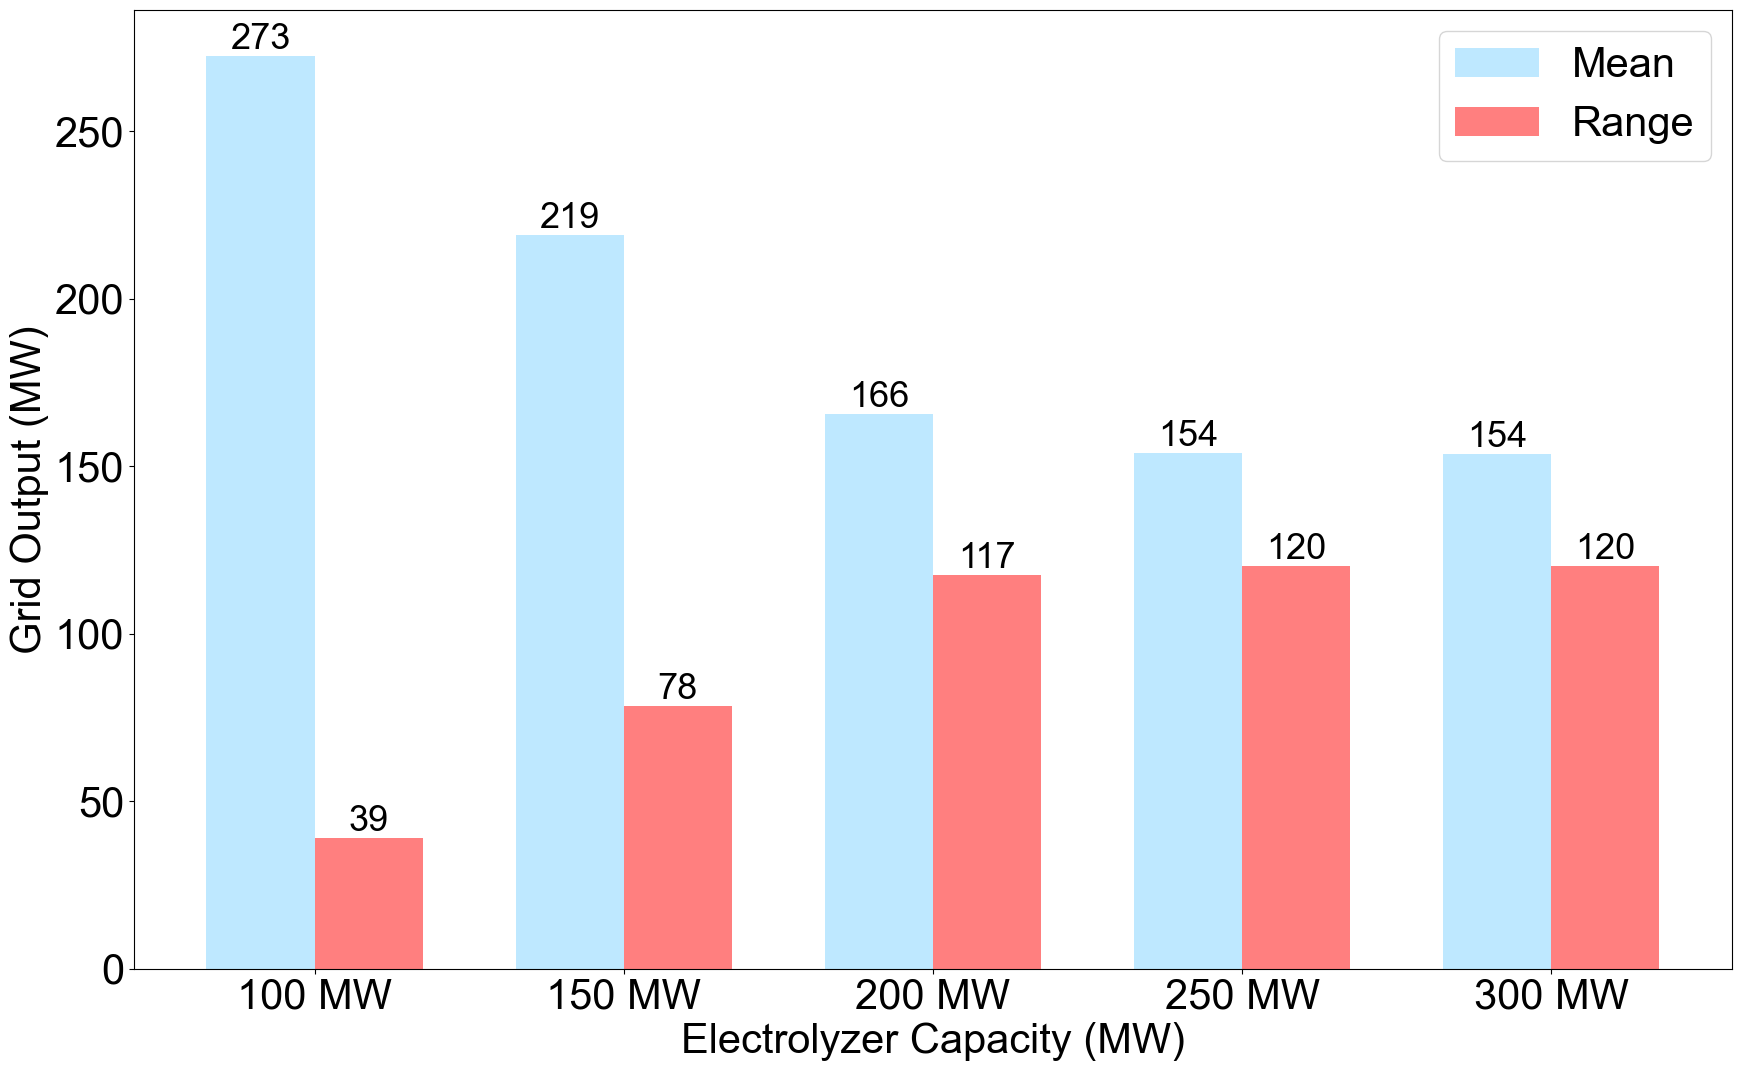

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from sa.xlsx, Capacity sheet
df = pd.read_excel('sa.xlsx', sheet_name='Capacity')

# Extract case names (100 MW, 150 MW, etc.)
cases = df.columns[1:].tolist()

# Extract the two data series by ITEM
mean_output = df.loc[df['ITEMS'] == 'grid_output_mean_MW', cases].values.flatten()
range_output = df.loc[df['ITEMS'] == 'grid_output_range_MW', cases].values.flatten()

# Create figure and axis
fig, ax = plt.subplots(figsize=(18, 11.29))
indices = np.arange(len(cases))
bar_width = 0.35

# Plot grouped bar chart
bars1 = ax.bar(indices - bar_width/2, mean_output, bar_width,
               color='#BEE8FF', label='Mean')
bars2 = ax.bar(indices + bar_width/2, range_output, bar_width,
               color='#FF7F7F', label='Range')

# Configure axes
ax.set_xticks(indices)
ax.set_xticklabels(cases)
ax.set_ylabel('Grid Output (MW)')
ax.set_xlabel('Electrolyzer Capacity (MW)')
ax.legend()

# Annotate bars with integer values and thousand separators
for bar in bars1:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, h,
            f"{h:,.0f}", ha='center', va='bottom')
for bar in bars2:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, h,
            f"{h:,.0f}", ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()
# plt.savefig('output/figs/sa_grid_output.pdf', bbox_inches='tight')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from sa.xlsx, Capacity sheet
df = pd.read_excel('sa.xlsx', sheet_name='Capacity')

# Extract case names (100 MW, 150 MW, etc.)
cases = df.columns[1:].tolist()

# Extract the two data series by ITEM
mean_output = df.loc[df['ITEMS'] == 'electrolyzer_avg_ramp_rate_MW_hr', cases].values.flatten()
range_output = df.loc[df['ITEMS'] == 'turbine_avg_ramp_rate_MW_hr', cases].values.flatten()

# Create figure and axis
fig, ax = plt.subplots(figsize=(18, 11.29))
indices = np.arange(len(cases))
bar_width = 0.35

# Plot grouped bar chart
bars1 = ax.bar(indices - bar_width/2, mean_output, bar_width,
               color='#FFD37F', label='Electrolyzer')
bars2 = ax.bar(indices + bar_width/2, range_output, bar_width,
               color='#B9B9B9', label='Turbine')

# Configure axes
ax.set_xticks(indices)
ax.set_xticklabels(cases)
ax.set_ylabel('Ramp Rate (MW/hr)')
ax.set_xlabel('Electrolyzer Capacity (MW)')
ax.legend()

# Annotate bars with integer values and thousand separators
for bar in bars1:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, h,
            f"{h:,.2f}", ha='center', va='bottom')
for bar in bars2:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, h,
            f"{h:,.2f}", ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()
# plt.savefig('../output/figs/sa_grid_output.pdf', bbox_inches='tight')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load data
df = pd.read_excel('sa.xlsx', sheet_name='Capacity')
cases = df.columns[1:].tolist()
mean_output  = df.loc[df['ITEMS']=='grid_output_mean_MW',  cases].values.flatten()
range_output = df.loc[df['ITEMS']=='grid_output_range_MW', cases].values.flatten()

# Create figure
fig, ax = plt.subplots(figsize=(18, 11.29))
indices = np.arange(len(cases))
bar_width = 0.35

# Plot the bars with no facecolor (we’ll fill them via gradient)
bars1 = ax.bar(indices - bar_width/2, mean_output, bar_width,
               facecolor='none', edgecolor='#BEE8FF', label='Mean (MW)', zorder=2)
bars2 = ax.bar(indices + bar_width/2, range_output, bar_width,
               facecolor='none', edgecolor='#FF7F7F', label='Range (MW)', zorder=2)

# For each bar, draw a vertical gradient patch underneath
for bar in list(bars1) + list(bars2):
    x, y = bar.get_x(), 0
    w, h = bar.get_width(), bar.get_height()
    # get the bar’s edge color as RGB
    r, g, b, _ = bar.get_edgecolor()
    # build a 256×1 RGBA gradient: alpha fades from 1→0
    alpha = np.linspace(1, 0, 256)[:, None]
    grad = np.zeros((256, 1, 4))
    grad[..., 0] = r
    grad[..., 1] = g
    grad[..., 2] = b
    grad[..., 3] = alpha
    # draw it spanning the bar’s extent
    ax.imshow(grad,
              extent=[x, x + w, y, y + h],
              aspect='auto',
              zorder=1)

# Labels, legend, annotations
ax.set_xticks(indices)
ax.set_xticklabels(cases)
ax.set_ylabel('Grid Output (MW)')
ax.set_xlabel('Electrolyzer Capacity (MW)')
ax.legend()

# annotate values on top
for bar in list(bars1) + list(bars2):
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h,
            f"{h:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
